In [850]:
# IMPORTING PACKAGES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [851]:
#READING THE DATA SETS PROVIDED 

matches_df=pd.read_csv("D:\Desktop\The_ Sparks_ Foundation\IPL_DATASET\matches.csv")

In [852]:
scorecard_df=pd.read_csv("D:\Desktop\The_ Sparks_ Foundation\IPL_DATASET\deliveries.csv")

In [853]:
# HAVING A LOOK AT THE MATCHES DATASET

matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [854]:
# HAVING A LOOK AT THE SCORECARD (BALL BY BALL) DATASET

scorecard_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [855]:
# GAINING INFORMATION ABOUT THE TWO DATSETS

print(matches_df.info())
print(scorecard_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [856]:
# Number of null values in umpire3 variable

matches_df["umpire3"].isnull().sum()

637

In [857]:
# first 638 values of umpire3
matches_df["umpire3"].head(638)

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
633               NaN
634               NaN
635               NaN
636    Anil Chaudhary
637       Nitin Menon
Name: umpire3, Length: 638, dtype: object

In [858]:
# Description of matches data

matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [859]:
# SEASONS IN THE DATASET

matches_df["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [860]:
# NUMBER OF SEASONS IN THE DATA SET

matches_df["season"].nunique()

12

In [861]:
# NUMBER OF MATCHES 

matches_df["id"].nunique()

756

In [862]:
# NUMBER OF CITIES

matches_df["city"].nunique()

32

In [863]:
# TOTAL NUMBER OF VENUES

matches_df["venue"].nunique()

41

In [864]:
# Description of scorecard data

scorecard_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [866]:
# Win by maximum runs (Details about the match)

matches_df.iloc[matches_df["win_by_runs"].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [867]:
#index number of the match which was won by maximum runs

matches_df["win_by_runs"].idxmax()

43

In [868]:
# maximum value of win_by_runs

matches_df["win_by_runs"].max()

146

In [869]:
# name of the team who won by maximum runs

matches_df.iloc[matches_df["win_by_runs"].idxmax()]["winner"]

'Mumbai Indians'

In [870]:
# player of the match which was won by maximum runs

matches_df.iloc[matches_df["win_by_runs"].idxmax()]["player_of_match"]

'LMP Simmons'

In [871]:
# win by maximum wickets

matches_df.iloc[matches_df["win_by_wickets"].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [872]:
# Team won by maximum wickets

matches_df.iloc[matches_df["win_by_wickets"].idxmax()]["winner"]

'Kolkata Knight Riders'

In [873]:
# Team won by minimum wickets

win_by_min_wickets=matches_df.iloc[matches_df[matches_df["win_by_wickets"].ge(1)]["win_by_wickets"].idxmin()]

In [874]:
print(win_by_min_wickets)

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object


In [875]:
print(win_by_min_wickets["winner"])

Kolkata Knight Riders


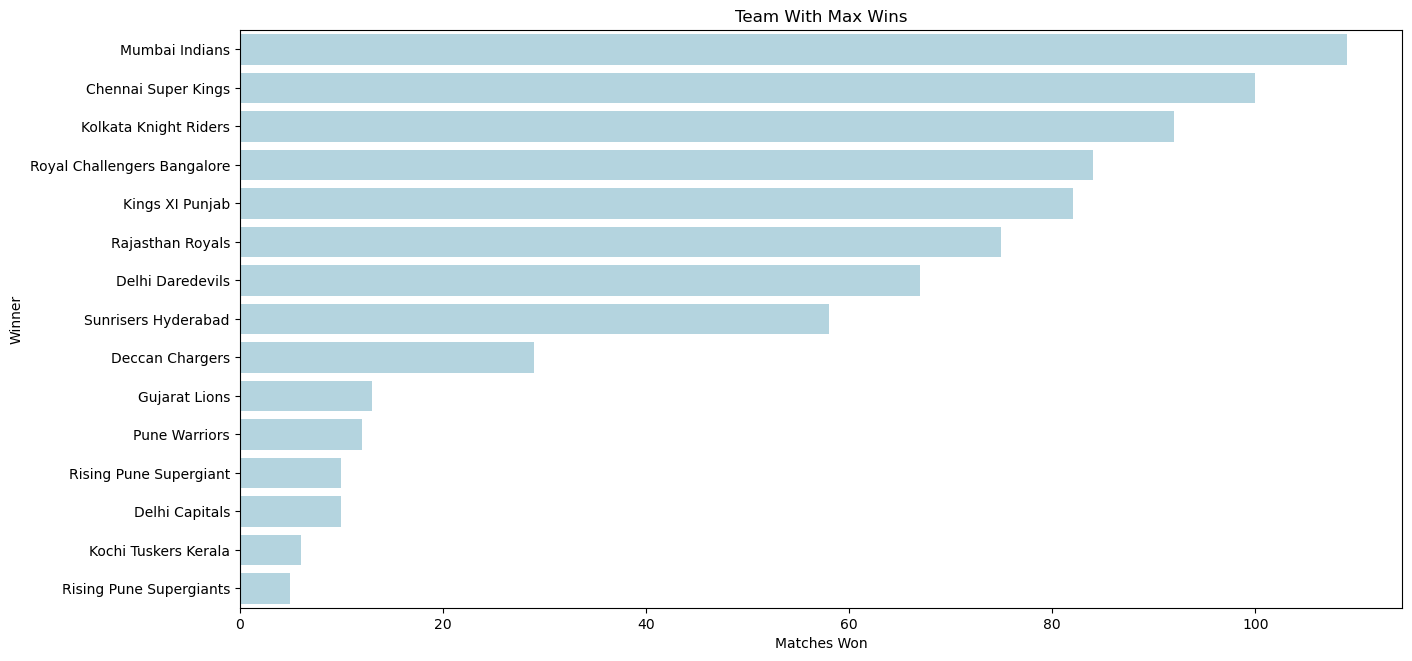

In [1111]:
# Team winning the maximum number of matches

winning_team=matches_df["winner"].value_counts()
plt.figure(figsize=(15,7.5))
sns.barplot(y=winning_team.index,x=winning_team,orient='h',color="lightblue")
plt.xlabel("Matches Won")
plt.ylabel("Winner")
plt.title("Team With Max Wins")
plt.show()

In [877]:
winning_team.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant',
       'Delhi Capitals', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype='object', name='winner')

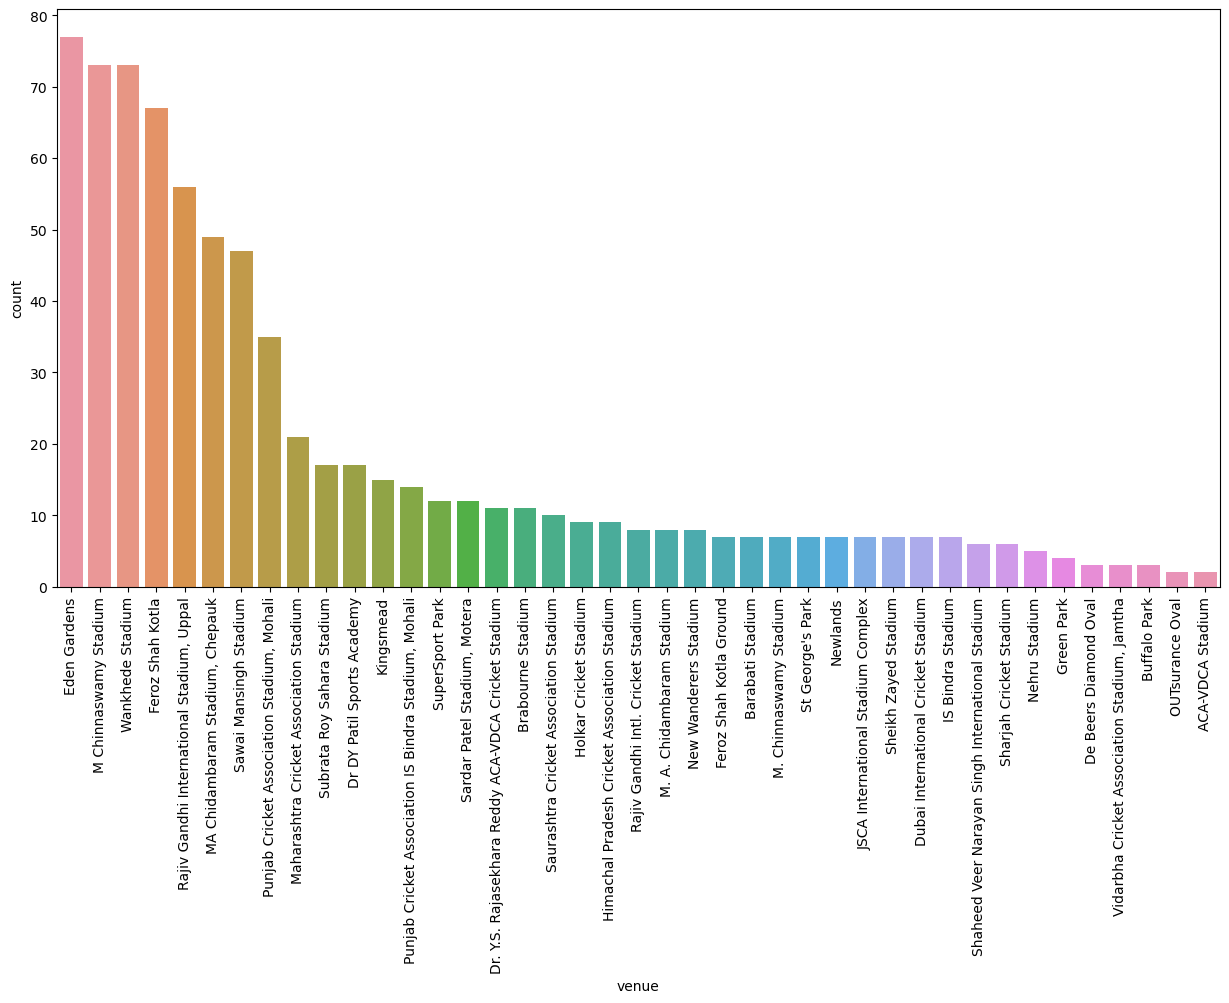

In [882]:
# Countplot of matches in each venue

venues=matches_df["venue"].value_counts()
plt.figure(figsize=(15,7.5))
sns.barplot(x=venues.index,y=venues,orient="v")
plt.xticks(rotation="vertical")
plt.show()

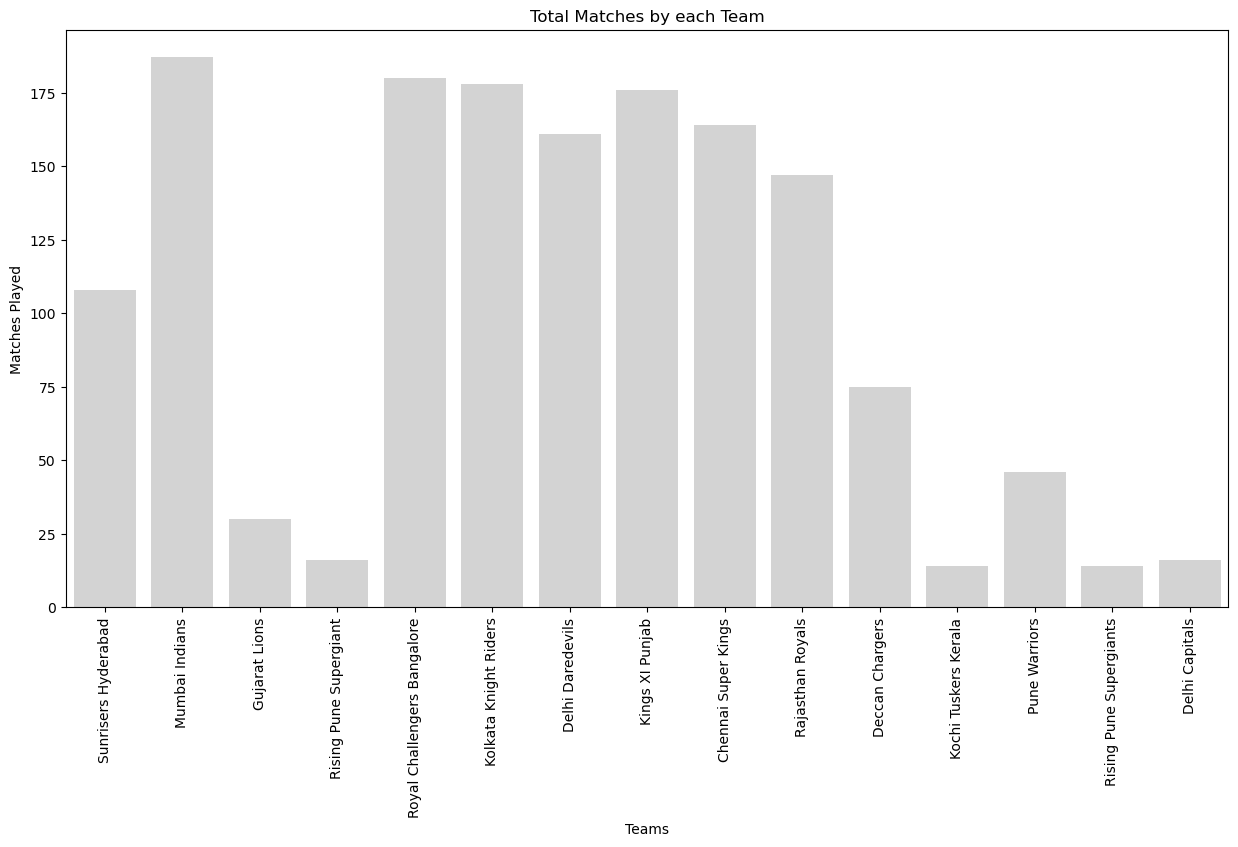

In [1112]:
# Finding the total matches played by each team

melted_df=pd.melt(matches_df,id_vars=["id","season"],value_vars=["team1","team2"],value_name="Teams")
plt.figure(figsize=(15,7.5))
sns.countplot(x="Teams",data=melted_df,color="lightgrey")
plt.ylabel("Matches Played")
plt.title("Total Matches by each Team")
plt.xticks(rotation="vertical")
plt.show()

In [1095]:
# Champions each season

champ_df=matches_df.drop_duplicates(subset=["season"],keep="last")[["season","winner"]].reset_index(drop=True).sort_values(by="season",ascending=True).reset_index(drop=True)

In [1096]:
print(champ_df)

    season                 winner
0     2008       Rajasthan Royals
1     2009        Deccan Chargers
2     2010    Chennai Super Kings
3     2011    Chennai Super Kings
4     2012  Kolkata Knight Riders
5     2013         Mumbai Indians
6     2014  Kolkata Knight Riders
7     2015         Mumbai Indians
8     2016    Sunrisers Hyderabad
9     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians


In [886]:
# IPL Winners (count)

champ_df["winner"].value_counts()

winner
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64

In [887]:
# IPL Winners bar plot

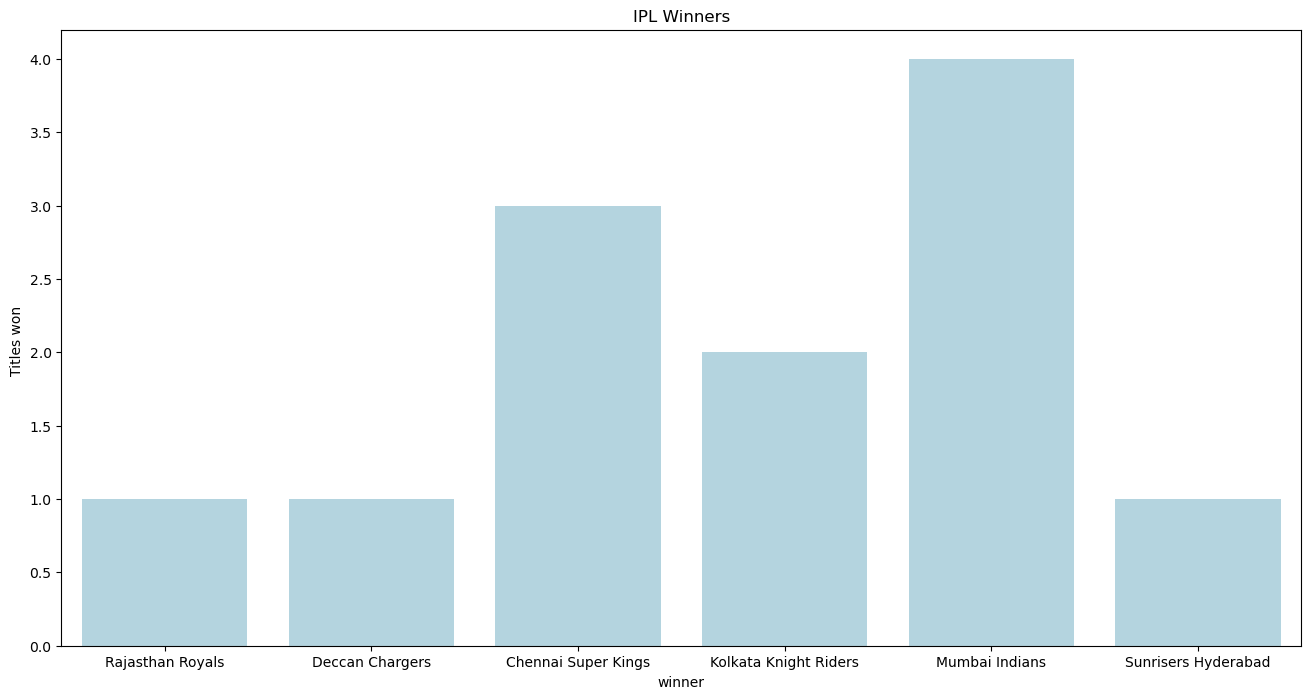

In [1113]:
plt.figure(figsize=(16,8))
sns.countplot(x="winner",data=champ_df,color="lightblue")
plt.ylabel("Titles won ")
plt.title ("IPL Winners")
plt.show()

In [889]:
# Toss Decisions

toss_df=matches_df["toss_decision"].value_counts()
print(toss_df)

toss_decision
field    463
bat      293
Name: count, dtype: int64


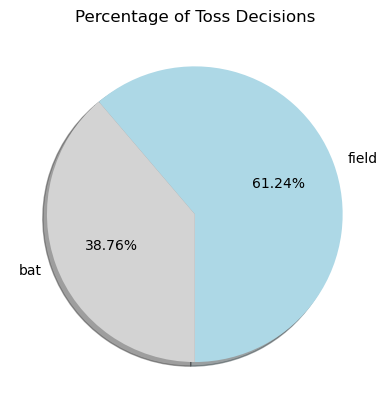

In [1109]:
# Representing toss decisions using pie chart

label=np.array(toss_df.index)
slices=(np.array(toss_df/toss_df.sum())*100)
plt.pie(slices,labels=label,colors=["LightBlue","lightgrey"],autopct="%1.2f%%",shadow="True",startangle=270)
plt.title("Percentage of Toss Decisions")
plt.show()

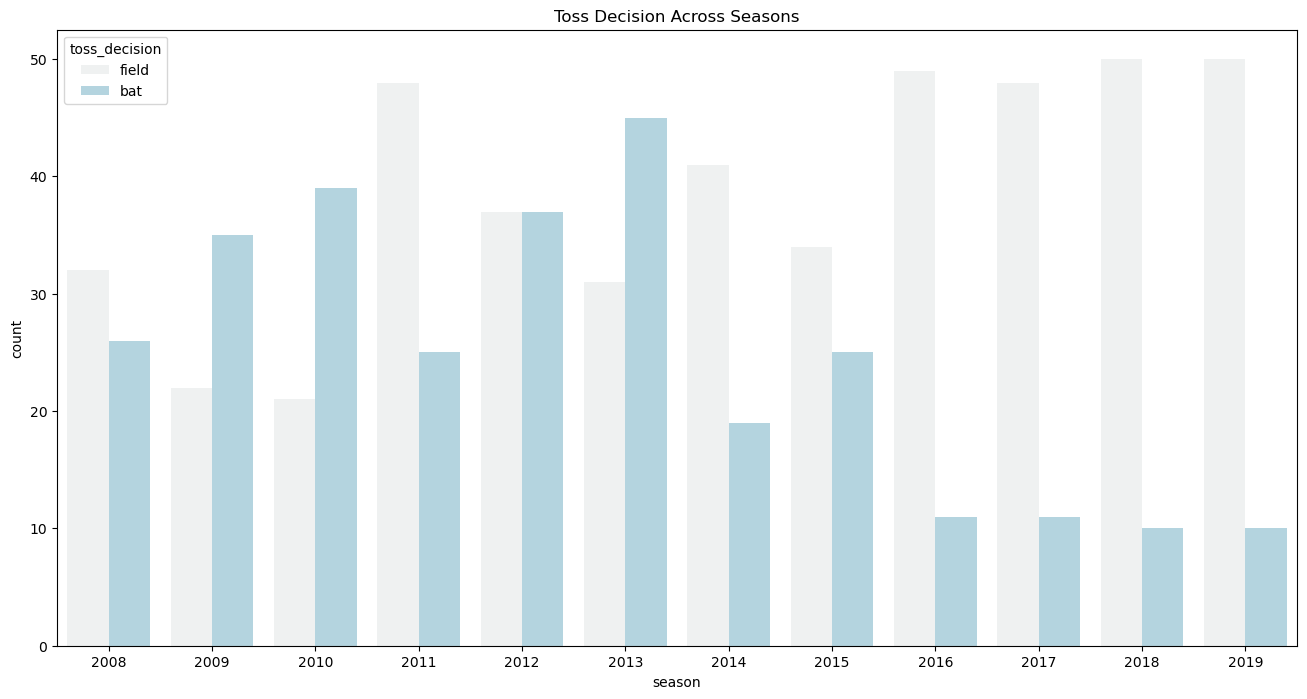

In [1110]:
#Toss Decisons across Seasons

plt.figure(figsize=(16,8))
sns.countplot(x="season",hue="toss_decision",data=matches_df,color="lightblue")
plt.title("Toss Decision Across Seasons")
plt.show()

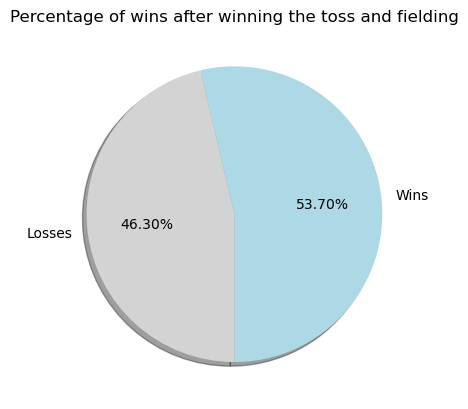

In [1108]:
# Checking the percentage of wins after winning the toss and fielding

wins_after_winning_toss_fielding=(matches_df["win_by_wickets"]>0).sum()
losses_after_winning_toss_fielding=(matches_df["win_by_wickets"]==0).sum()
summation=float(wins_after_winning_toss_fielding+losses_after_winning_toss_fielding)
label=["Wins","Losses"]
slices=[(wins_after_winning_toss_fielding/summation)*100,(losses_after_winning_toss_fielding/summation)*100]
plt.pie(slices,labels=label,colors=["LightBlue","LightGrey"],startangle=270,shadow="True",autopct="%1.2f%%")
plt.title("Percentage of wins after winning the toss and fielding")
plt.show()


In [893]:
# Function for Labelling
def labelling(bars):
    for i in bars:
        height=i.get_height()
        ax.text((i.get_x()+i.get_width()/2),1.02*height,"%d"%int(height),ha="center",va="bottom")

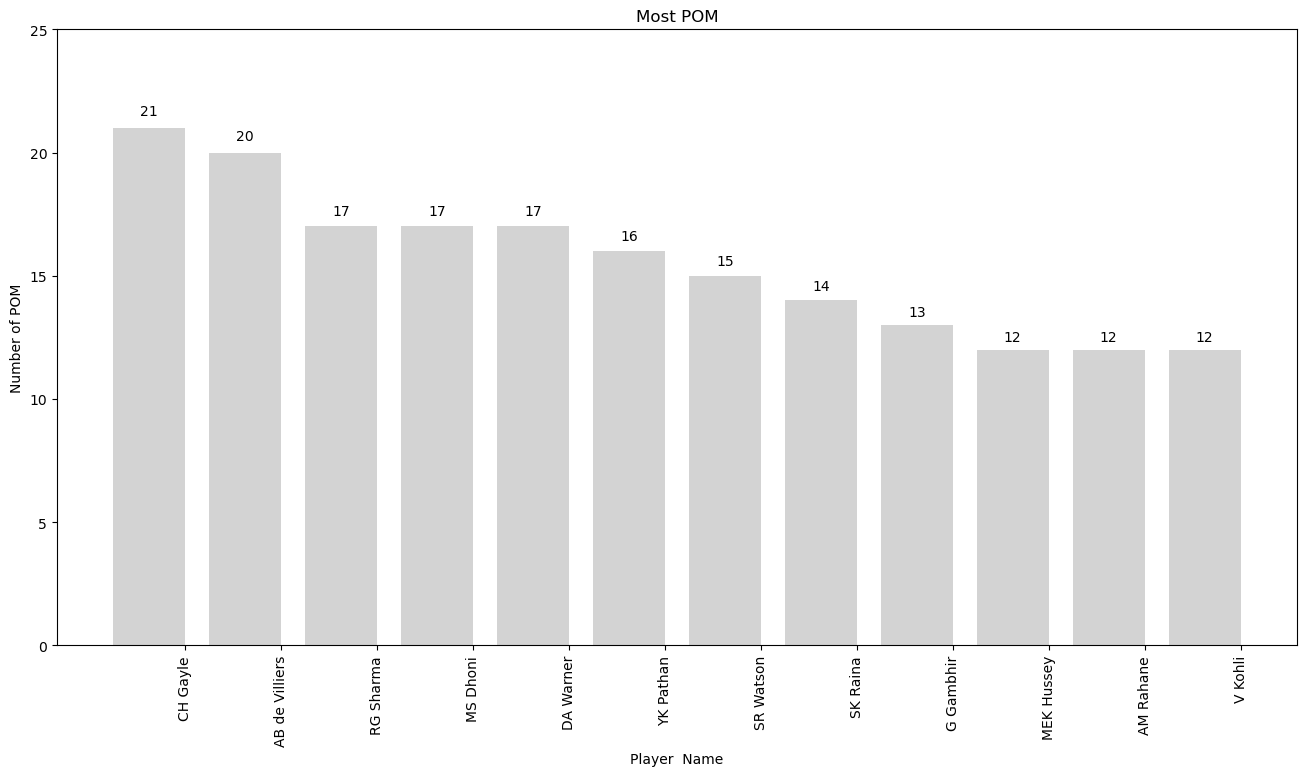

In [1107]:
# Most Player of The Match (POM) Awards

most_number_of_pom=matches_df["player_of_match"].value_counts()[:12]
label=np.array(most_number_of_pom.index)
indices=np.arange(len(label))
fig,ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(most_number_of_pom),width=0.75,color="lightgrey")
ax.set_ylim(0,25)
ax.set_ylabel("Number of POM")
ax.set_xlabel("Player  Name")
ax.set_xticks(indices+(0.75/2.))
ax.set_xticklabels(label,rotation="vertical")
ax.set_title("Most POM")
labelling(bars)
plt.show()


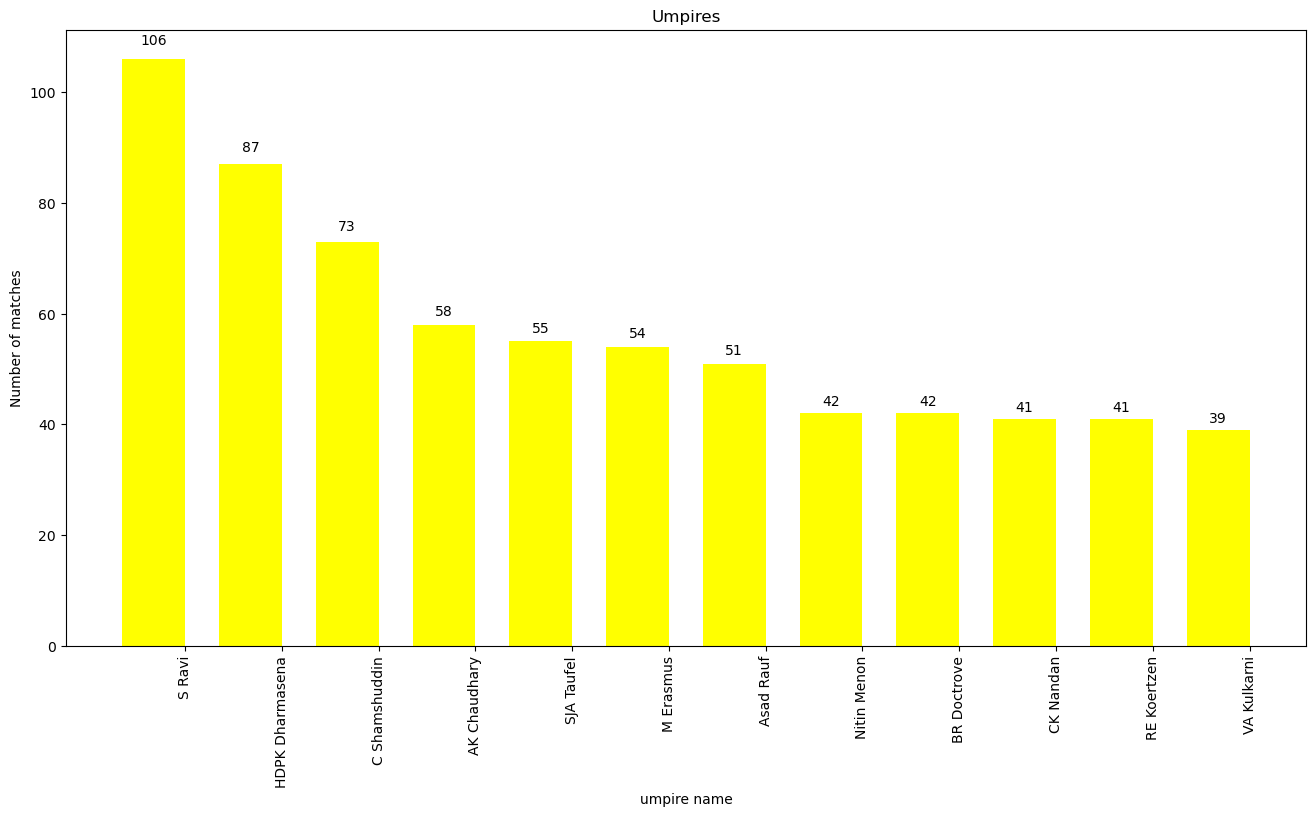

In [895]:
# Umpires stood for most matches

ump_df=pd.melt(matches_df,id_vars="id",value_vars=["umpire1","umpire2"],value_name="umpires")
most_ump=ump_df["umpires"].value_counts()[:12]
label=np.array(most_ump.index)
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(most_ump),width=0.65,color="yellow")
ax.set_xticks(indices+(0.65/2.0))
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Number of matches")
ax.set_xlabel("umpire name")
ax.set_title("Umpires")
labelling(bars)
plt.show()

In [898]:
#SCORECARD DATA ANALYSIS

# First 10 Batsmen with most number of runs 

most_runs=scorecard_df.groupby("batsman")["batsman_runs"].agg("sum").reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
print(most_runs.iloc[:10])

          batsman  batsman_runs
0         V Kohli          5434
1        SK Raina          5415
2       RG Sharma          4914
3       DA Warner          4741
4        S Dhawan          4632
5        CH Gayle          4560
6        MS Dhoni          4477
7      RV Uthappa          4446
8  AB de Villiers          4428
9       G Gambhir          4223


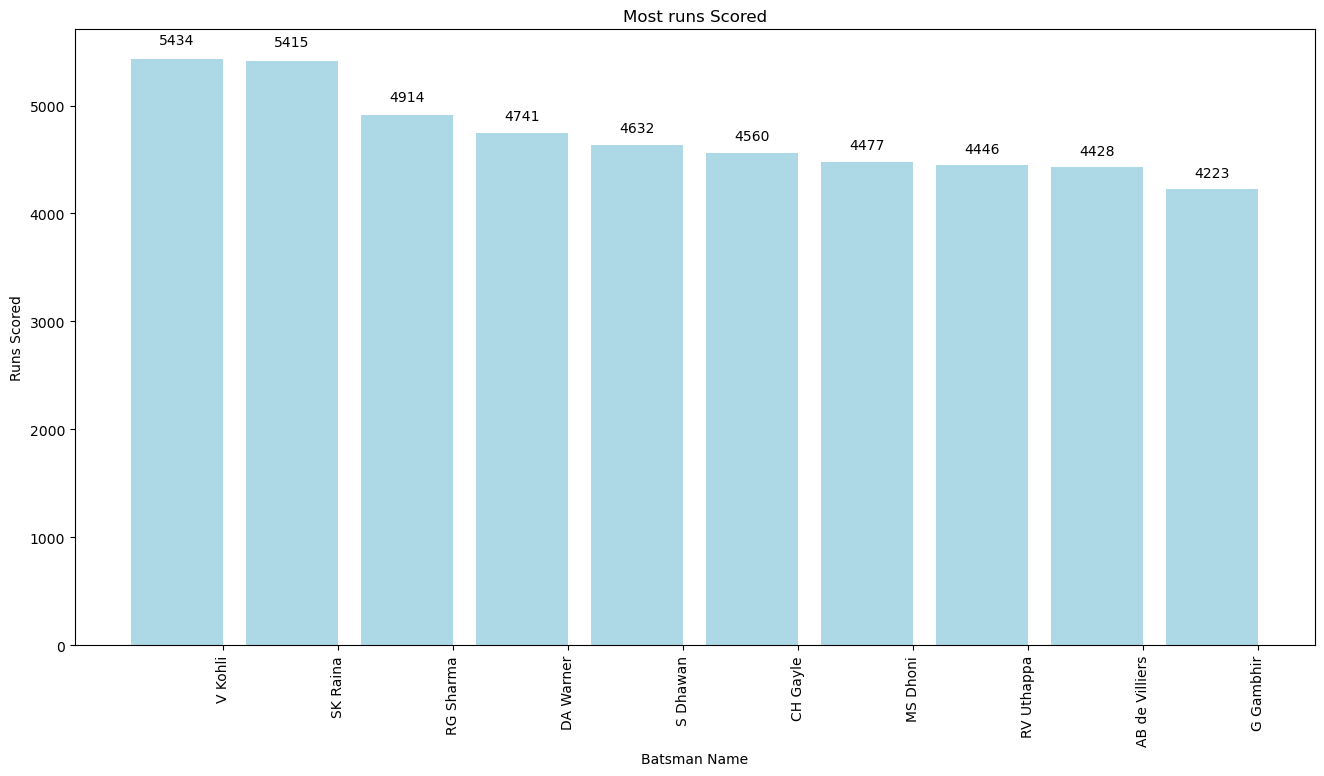

In [899]:
most_runs_ten=most_runs.iloc[:10]
label=np.array(most_runs_ten["batsman"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(most_runs_ten["batsman_runs"]),width=0.8, color="LightBlue")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Runs Scored")
ax.set_title("Most runs Scored")
ax.set_xlabel("Batsman Name")
labelling(bars)
plt.show()

In [900]:
# Batsman with Most Number of Boundaries (4's)

most_boundaries=scorecard_df.groupby("batsman")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
print(most_boundaries.iloc[:10])

      batsman  batsman_runs
0    S Dhawan           526
1    SK Raina           495
2   G Gambhir           492
3     V Kohli           482
4   DA Warner           459
5  RV Uthappa           436
6   RG Sharma           431
7   AM Rahane           405
8    CH Gayle           376
9    PA Patel           366


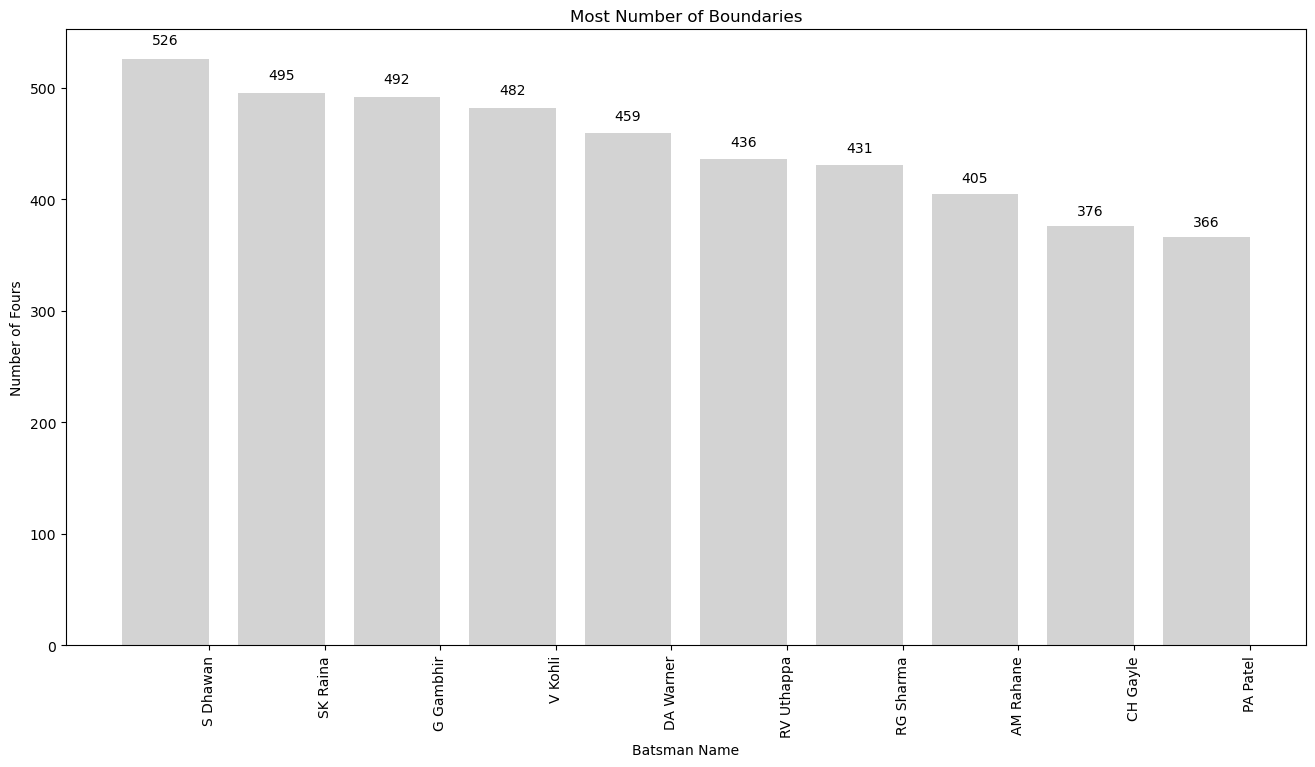

In [1105]:
most_boundaries_ten=most_boundaries.iloc[:10]
label=np.array(most_boundaries_ten["batsman"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(most_boundaries_ten["batsman_runs"]),width=0.75,color="lightgrey")
ax.set_xticks(indices+0.75/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Number of Fours")
ax.set_xlabel("Batsman Name")
ax.set_title("Most Number of Boundaries")
labelling(bars)
plt.show()

In [902]:
# Most Number of Sixes

most_sixes=scorecard_df.groupby("batsman")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
most_sixes_ten=most_sixes.iloc[:10]
print(most_sixes_ten)

          batsman  batsman_runs
0        CH Gayle           327
1  AB de Villiers           214
2        MS Dhoni           207
3        SK Raina           195
4       RG Sharma           194
5         V Kohli           191
6       DA Warner           181
7       SR Watson           177
8      KA Pollard           175
9       YK Pathan           161


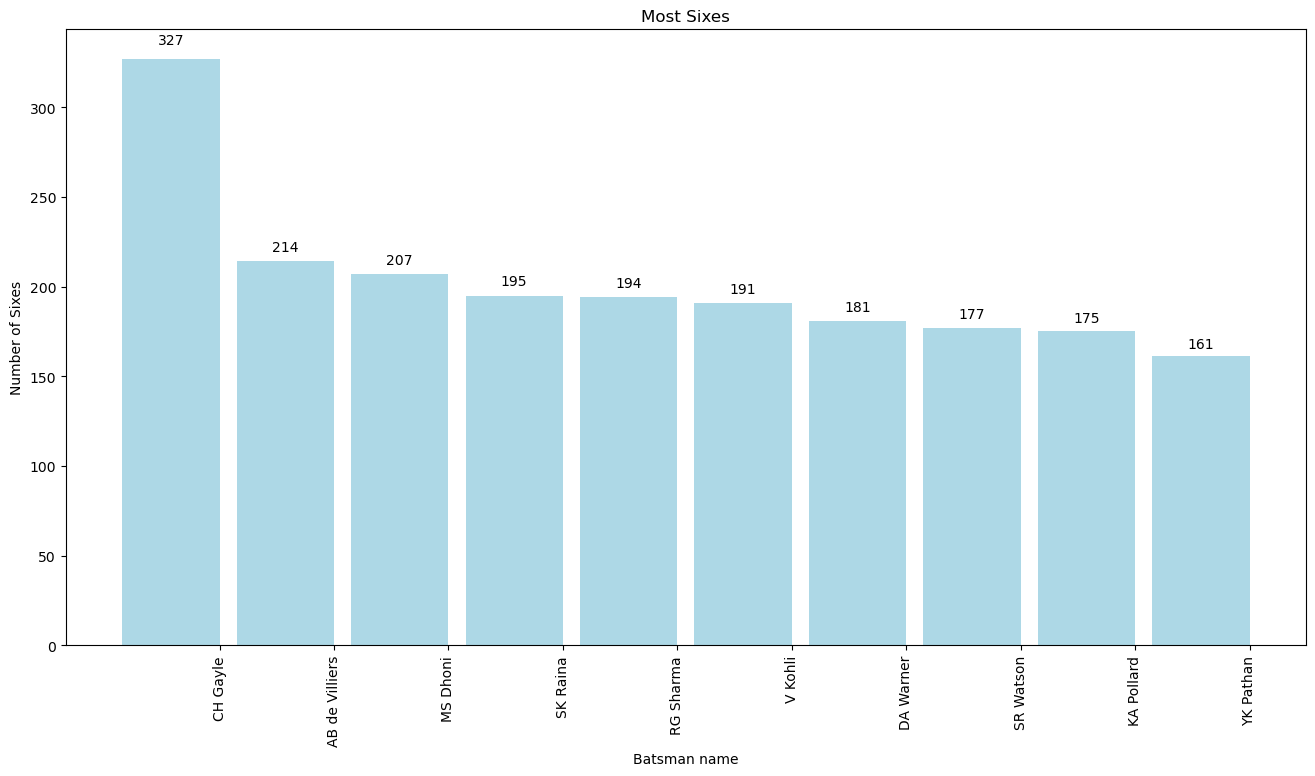

In [1106]:
label=np.array(most_sixes_ten["batsman"])
indices=np.arange(len(label))
fig,ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(most_sixes_ten["batsman_runs"]),width=0.85,color="Lightblue")
ax.set_xticks(indices+0.85/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Number of Sixes")
ax.set_xlabel("Batsman name")
ax.set_title("Most Sixes")
labelling(bars)
plt.show()

In [906]:
# Total balls faced by a batsman

balls_faced=scorecard_df.groupby("batsman")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
balls_faced_ten=balls_faced.iloc[:10]
print(balls_faced_ten)

      batsman  ball
0     V Kohli  4211
1    SK Raina  4044
2   RG Sharma  3816
3    S Dhawan  3776
4   G Gambhir  3524
5  RV Uthappa  3492
6   DA Warner  3398
7    MS Dhoni  3318
8   AM Rahane  3215
9    CH Gayle  3131


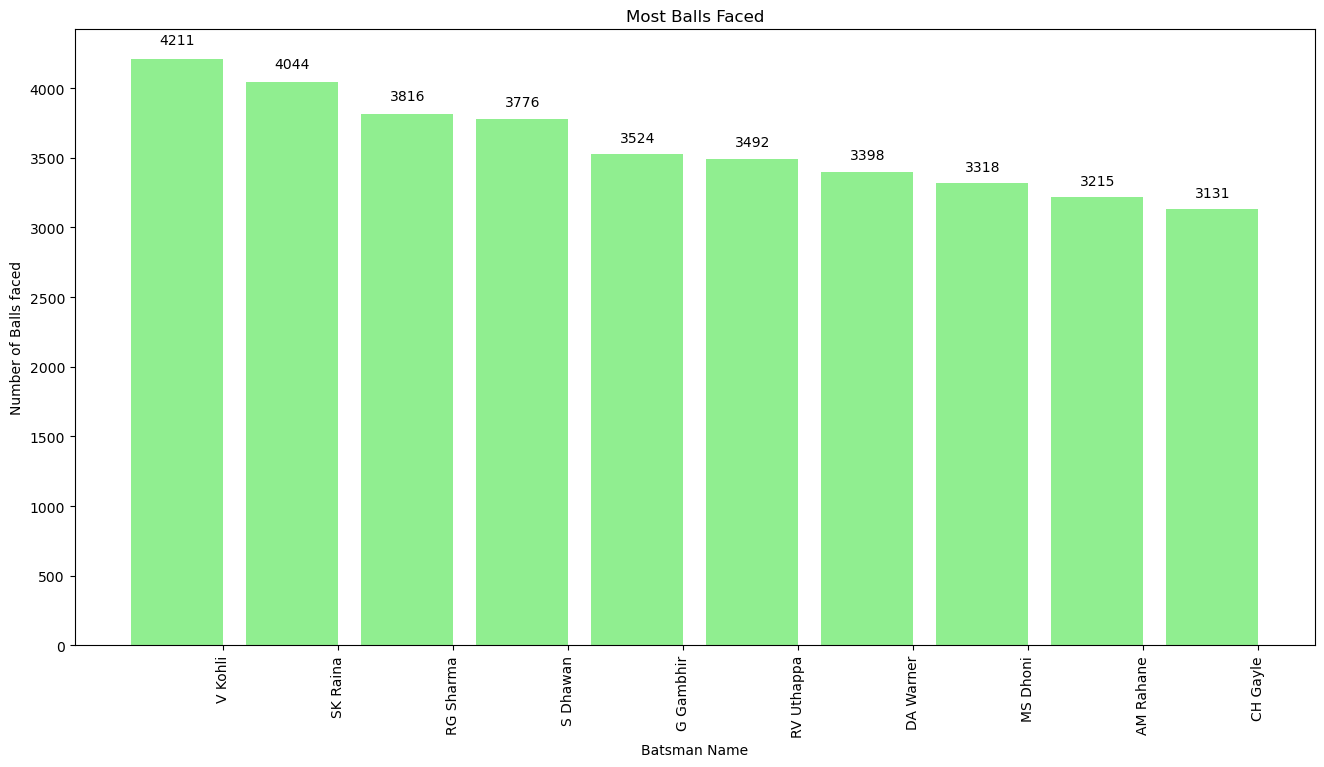

In [907]:
label=np.array(balls_faced_ten["batsman"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(balls_faced_ten["ball"]),width=0.8,color="lightgreen")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Number of Balls faced")
ax.set_xlabel("Batsman Name")
ax.set_title("Most Balls Faced")
labelling(bars)
plt.show()

In [908]:
# Strike Rate of a batsman

runs_scored=scorecard_df.groupby("batsman")["batsman_runs"].agg(sum).reset_index()
runs_scored.iloc[:10]


,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
5,A Flintoff,62
6,A Hales,152
7,A Joseph,15
8,A Kumble,35
9,A Mishra,368


In [909]:
balls_faced=scorecard_df.groupby("batsman")["ball"].count().reset_index()
balls_faced.iloc[:10]

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
5,A Flintoff,57
6,A Hales,119
7,A Joseph,13
8,A Kumble,49
9,A Mishra,410


In [910]:
#calculation of strike rate
strike_rate=((runs_scored["batsman_runs"]/balls_faced["ball"])*100)
strike_rate.iloc[:10]

0    142.857143
1     57.142857
2     70.666667
3    125.000000
4     80.000000
5    108.771930
6    127.731092
7    115.384615
8     71.428571
9     89.756098
dtype: float64

In [911]:
# Addition of new column

In [912]:
balls_faced.insert(2,"strike_rate_batter",strike_rate)
    

In [913]:
print(balls_faced)

            batsman  ball  strike_rate_batter
0    A Ashish Reddy   196          142.857143
1        A Chandila     7           57.142857
2          A Chopra    75           70.666667
3       A Choudhary    20          125.000000
4       A Dananjaya     5           80.000000
..              ...   ...                 ...
511     YV Takawale   183          104.918033
512   Yashpal Singh    67           70.149254
513     Younis Khan     7           42.857143
514    Yuvraj Singh  2207          125.283190
515          Z Khan   141           82.978723

[516 rows x 3 columns]


In [914]:
max_strike_rate_batter=balls_faced.sort_values(by="strike_rate_batter",ascending=False).reset_index(drop=True)

In [1098]:
max_strike_rate_batter.loc[max_strike_rate_batter.ball>=71][:10]

,batsman,ball,strike_rate_batter
4,AD Russell,803,179.950187
8,K Gowtham,86,172.093023
10,M Ali,183,169.945355
12,SP Narine,481,166.943867
16,BCJ Cutting,146,164.383562
17,Kamran Akmal,78,164.102564
21,RR Pant,1104,162.318841
22,N Pooran,110,160.909091
24,J Bairstow,293,159.726962
27,CR Brathwaite,120,156.666667


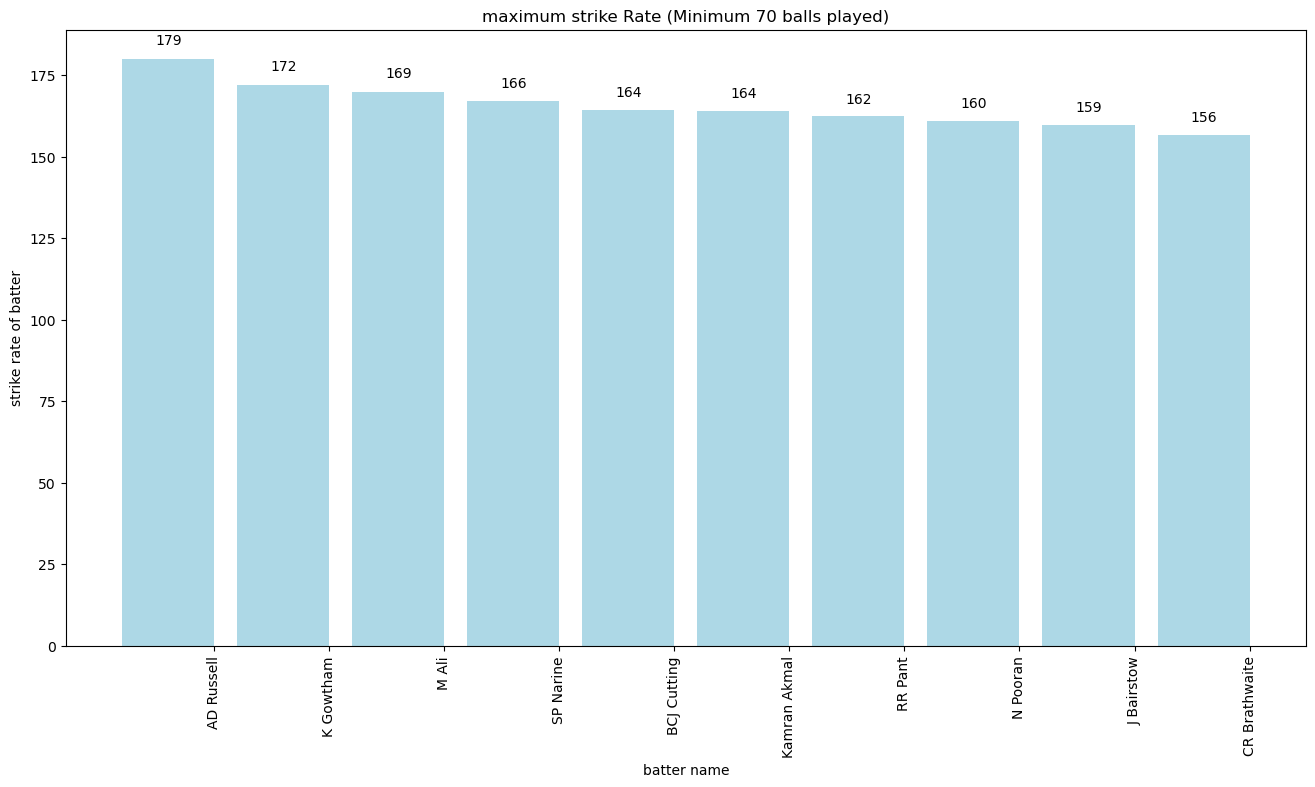

In [1099]:
# Maximum Strike rate (minimum 71 balls)
max_strike_rate_ten_batter=max_strike_rate_batter.loc[max_strike_rate_batter.ball>71][:10]
label=np.array(max_strike_rate_ten_batter["batsman"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(max_strike_rate_ten_batter["strike_rate_batter"]),width=0.8,color="lightblue")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("strike rate of batter")
ax.set_xlabel("batter name")
ax.set_title("maximum strike Rate (Minimum 70 balls played)")
labelling(bars)
plt.show()

In [918]:
# PLAYER DISMISSED MOST NUMBER OF TIMES

dis_missal=scorecard_df.groupby("batsman")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)

In [919]:
dis_missal.iloc[:10]

,batsman,player_dismissed
0,RG Sharma,162
1,SK Raina,161
2,RV Uthappa,157
3,V Kohli,152
4,KD Karthik,140
5,S Dhawan,137
6,G Gambhir,135
7,PA Patel,127
8,MS Dhoni,118
9,AM Rahane,117


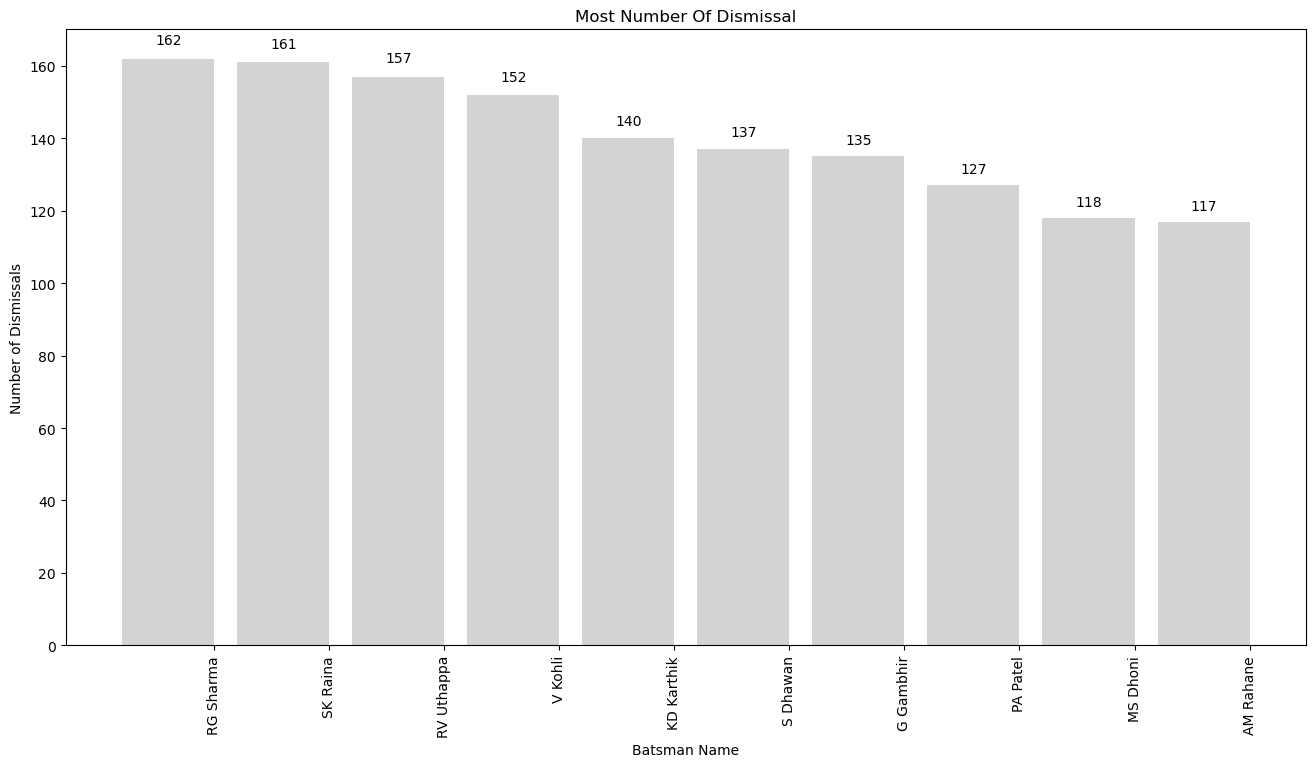

In [920]:
most_dismissal=dis_missal.iloc[:10]
label=np.array(most_dismissal["batsman"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(most_dismissal["player_dismissed"]),width=0.8,color="lightgrey")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Number of Dismissals")
ax.set_xlabel("Batsman Name")
ax.set_title("Most Number Of Dismissal")
labelling(bars)
plt.show()


In [921]:
# Batter average Calculation

dis_miss=scorecard_df.groupby("batsman")["player_dismissed"].count().reset_index()

In [922]:
print(dis_miss)

            batsman  player_dismissed
0    A Ashish Reddy                15
1        A Chandila                 1
2          A Chopra                 5
3       A Choudhary                 2
4       A Dananjaya                 0
..              ...               ...
511     YV Takawale                 8
512   Yashpal Singh                 4
513     Younis Khan                 1
514    Yuvraj Singh               109
515          Z Khan                15

[516 rows x 2 columns]


In [923]:
batter_average=(runs_scored["batsman_runs"]/dis_miss["player_dismissed"])

In [924]:
runs_scored.insert(2,"batting_average",batter_average)

In [925]:
print(dis_miss)

            batsman  player_dismissed
0    A Ashish Reddy                15
1        A Chandila                 1
2          A Chopra                 5
3       A Choudhary                 2
4       A Dananjaya                 0
..              ...               ...
511     YV Takawale                 8
512   Yashpal Singh                 4
513     Younis Khan                 1
514    Yuvraj Singh               109
515          Z Khan                15

[516 rows x 2 columns]


In [926]:
print(runs_scored)

            batsman  batsman_runs  batting_average
0    A Ashish Reddy           280        18.666667
1        A Chandila             4         4.000000
2          A Chopra            53        10.600000
3       A Choudhary            25        12.500000
4       A Dananjaya             4              inf
..              ...           ...              ...
511     YV Takawale           192        24.000000
512   Yashpal Singh            47        11.750000
513     Younis Khan             3         3.000000
514    Yuvraj Singh          2765        25.366972
515          Z Khan           117         7.800000

[516 rows x 3 columns]


In [1100]:
batter_average_top=runs_scored.sort_values(by="batting_average",ascending=False).reset_index(drop=True)
batter_average_top_value=batter_average_top.loc[batter_average_top.batsman_runs>=74]

In [1101]:
print(batter_average_top_value[:10])

           batsman  batsman_runs  batting_average
29   Iqbal Abdulla            88        88.000000
30      J Bairstow           468        58.500000
31      MN van Wyk           167        55.666667
32  PD Collingwood           203        50.750000
33         HM Amla           577        44.384615
34  AB de Villiers          4428        42.576923
35         R Parag           169        42.250000
36       JP Duminy          2041        41.653061
37       DA Warner          4741        41.587719
38        CH Gayle          4560        41.454545


In [1102]:
batter_average_top_ten=batter_average_top_value[:10]

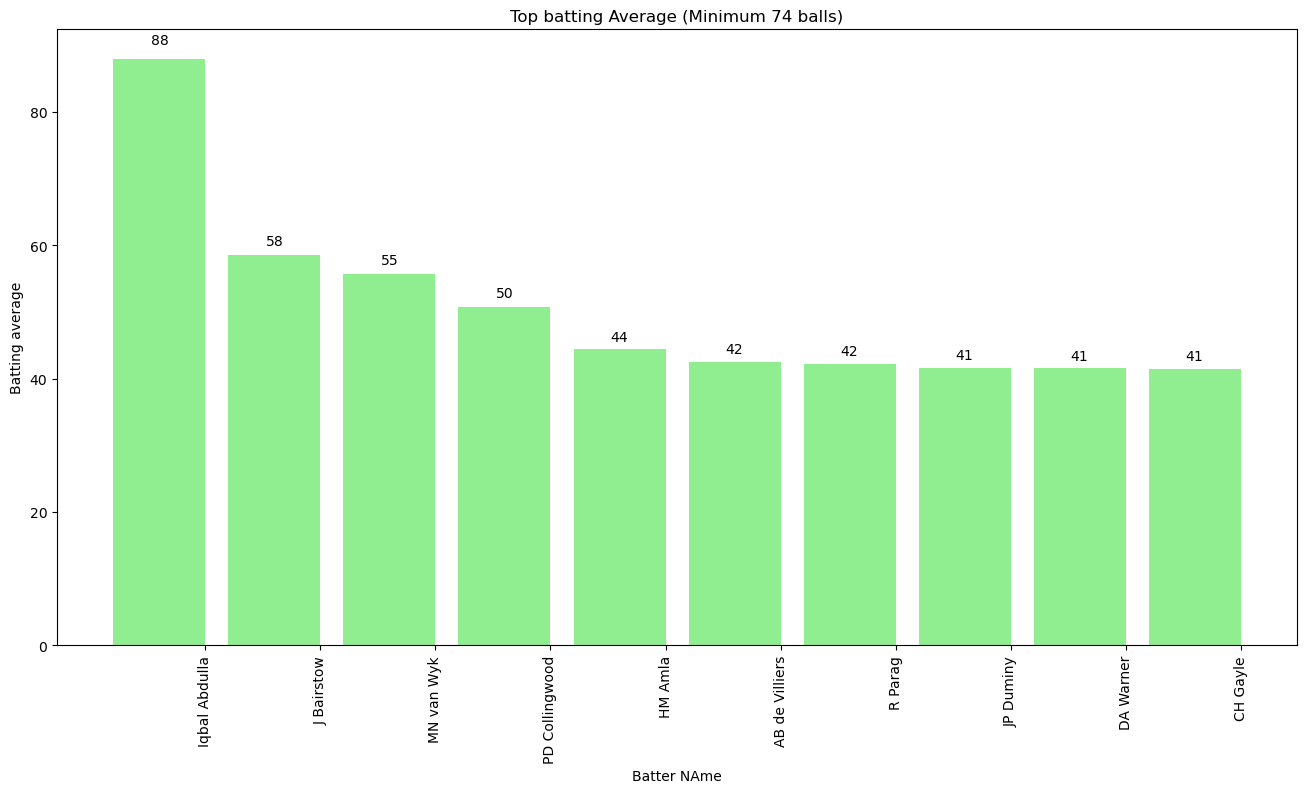

In [1104]:
label=np.array(batter_average_top_ten["batsman"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(batter_average_top_ten["batting_average"]),width=0.8,color="lightgreen")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Batting average")
ax.set_xlabel("Batter NAme")
ax.set_title("Top batting Average (Minimum 74 balls)")
labelling(bars)
plt.show()

In [931]:
# Bowler Analysis

# Removing runouts to calculate number of wickets taken by a bowler

wickets_df=scorecard_df[scorecard_df["dismissal_kind"]!="run out"]

In [932]:
most_wickets=wickets_df.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)

In [933]:
most_wickets.iloc[:10]

,bowler,player_dismissed
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


In [934]:
# Balls Bowled
balls_bowled=scorecard_df.groupby("bowler")["ball"].agg("count").reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)

In [935]:
balls_bowled.iloc[:10]

,bowler,ball
0,Harbhajan Singh,3451
1,A Mishra,3172
2,PP Chawla,3157
3,R Ashwin,3016
4,SL Malinga,2974
5,DJ Bravo,2711
6,B Kumar,2707
7,P Kumar,2637
8,UT Yadav,2605
9,SP Narine,2600


In [936]:
balls_bowled_unsorted=scorecard_df.groupby("bowler")["ball"].agg("count").reset_index()

In [937]:
overs_bowled=(balls_bowled_unsorted["ball"]/6)

In [938]:
wickets_taken_unsorted=wickets_df.groupby("bowler")["player_dismissed"].count().reset_index()

In [939]:
# Bowling Strike Rate

In [940]:
bowling_strike_rate_unsorted=balls_bowled_unsorted["ball"]/wickets_taken_unsorted["player_dismissed"]

In [941]:
balls_bowled_unsorted.insert(2,"overs_bowled_by_bowler",overs_bowled)

In [942]:
balls_bowled_unsorted.insert(2,"bowling_strike_rate",bowling_strike_rate_unsorted)

In [943]:
print(balls_bowled_unsorted)

             bowler  ball  bowling_strike_rate  overs_bowled_by_bowler
0    A Ashish Reddy   270            15.000000               45.000000
1        A Chandila   234            21.272727               39.000000
2       A Choudhary   108            21.600000               18.000000
3       A Dananjaya    25                  inf                4.166667
4        A Flintoff    66            33.000000               11.000000
..              ...   ...                  ...                     ...
400      YA Abdulla   222            14.800000               37.000000
401       YK Pathan  1184            28.190476              197.333333
402       YS Chahal  1841            18.410000              306.833333
403    Yuvraj Singh   882            24.500000              147.000000
404          Z Khan  2276            22.097087              379.333333

[405 rows x 4 columns]


In [944]:
print(wickets_taken_unsorted)

             bowler  player_dismissed
0    A Ashish Reddy                18
1        A Chandila                11
2       A Choudhary                 5
3       A Dananjaya                 0
4        A Flintoff                 2
..              ...               ...
400      YA Abdulla                15
401       YK Pathan                42
402       YS Chahal               100
403    Yuvraj Singh                36
404          Z Khan               103

[405 rows x 2 columns]


In [945]:
bsr_sorted=balls_bowled_unsorted.sort_values(by="bowling_strike_rate",ascending=False).reset_index(drop=True)

In [946]:
#Calculation of runs conceeded by each bowler
runs_conceeded_bowler=scorecard_df["total_runs"]+-scorecard_df["bye_runs"]-scorecard_df["legbye_runs"]-scorecard_df["penalty_runs"]

In [947]:
scorecard_df.insert(7,"runs_conceeded_by_bowler",runs_conceeded_bowler)

In [949]:
# Calculation of Bowling average 
bowling_analysis=scorecard_df.groupby("bowler")["runs_conceeded_by_bowler"].agg("sum").reset_index()

In [950]:
bowling_analysis

,bowler,runs_conceeded_by_bowler
0,A Ashish Reddy,396
1,A Chandila,242
2,A Choudhary,144
3,A Dananjaya,48
4,A Flintoff,105
...,...,...
400,YA Abdulla,307
401,YK Pathan,1415
402,YS Chahal,2366
403,Yuvraj Singh,1078


In [951]:
bowling_analysis.insert(2,"Wickets_Taken",wickets_taken_unsorted["player_dismissed"])

In [952]:
bowling_analysis.insert(3,"Overs_Bowled",balls_bowled_unsorted["overs_bowled_by_bowler"])

In [953]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled
0,A Ashish Reddy,396,18,45.000000
1,A Chandila,242,11,39.000000
2,A Choudhary,144,5,18.000000
3,A Dananjaya,48,0,4.166667
4,A Flintoff,105,2,11.000000
...,...,...,...,...
400,YA Abdulla,307,15,37.000000
401,YK Pathan,1415,42,197.333333
402,YS Chahal,2366,100,306.833333
403,Yuvraj Singh,1078,36,147.000000


In [954]:
bowling_analysis.insert(4,"Balls_bowled",balls_bowled_unsorted["ball"])

In [955]:
bowling_analysis.insert(5,"Bowler_strike_rate",balls_bowled_unsorted["bowling_strike_rate"])

In [956]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate
0,A Ashish Reddy,396,18,45.000000,270,15.000000
1,A Chandila,242,11,39.000000,234,21.272727
2,A Choudhary,144,5,18.000000,108,21.600000
3,A Dananjaya,48,0,4.166667,25,inf
4,A Flintoff,105,2,11.000000,66,33.000000
...,...,...,...,...,...,...
400,YA Abdulla,307,15,37.000000,222,14.800000
401,YK Pathan,1415,42,197.333333,1184,28.190476
402,YS Chahal,2366,100,306.833333,1841,18.410000
403,Yuvraj Singh,1078,36,147.000000,882,24.500000


In [957]:
bowling_average=bowling_analysis["runs_conceeded_by_bowler"]/bowling_analysis["Wickets_Taken"]

In [958]:
bowling_economy=bowling_analysis["runs_conceeded_by_bowler"]/bowling_analysis["Overs_Bowled"]

In [959]:
bowling_analysis.insert(6,"Bowling_Average",bowling_average)

In [960]:
bowling_analysis.insert(7,"Bowling_Economy",bowling_economy)

In [961]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
0,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000
1,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128
2,A Choudhary,144,5,18.000000,108,21.600000,28.800000,8.000000
3,A Dananjaya,48,0,4.166667,25,inf,inf,11.520000
4,A Flintoff,105,2,11.000000,66,33.000000,52.500000,9.545455
...,...,...,...,...,...,...,...,...
400,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297
401,YK Pathan,1415,42,197.333333,1184,28.190476,33.690476,7.170608
402,YS Chahal,2366,100,306.833333,1841,18.410000,23.660000,7.711027
403,Yuvraj Singh,1078,36,147.000000,882,24.500000,29.944444,7.333333


In [962]:
# MAXIMUM BALLS BOWLED

max_balls_bowled=bowling_analysis.sort_values(by=["Balls_bowled"],ascending=False).reset_index(drop=True)

In [963]:
max_balls_bowled_ten=max_balls_bowled.iloc[:10]

In [964]:
max_balls_bowled_ten

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
0,Harbhajan Singh,3979,150,575.166667,3451,23.006667,26.526667,6.917995
1,A Mishra,3804,156,528.666667,3172,20.333333,24.384615,7.195460
2,PP Chawla,4086,149,526.166667,3157,21.187919,27.422819,7.765600
3,R Ashwin,3337,125,502.666667,3016,24.128000,26.696000,6.638594
4,SL Malinga,3390,170,495.666667,2974,17.494118,19.941176,6.839274
5,DJ Bravo,3662,147,451.833333,2711,18.442177,24.911565,8.104758
6,B Kumar,3185,133,451.166667,2707,20.353383,23.947368,7.059475
7,P Kumar,3251,90,439.500000,2637,29.300000,36.122222,7.397042
8,UT Yadav,3550,119,434.166667,2605,21.890756,29.831933,8.176583
9,SP Narine,2884,122,433.333333,2600,21.311475,23.639344,6.655385


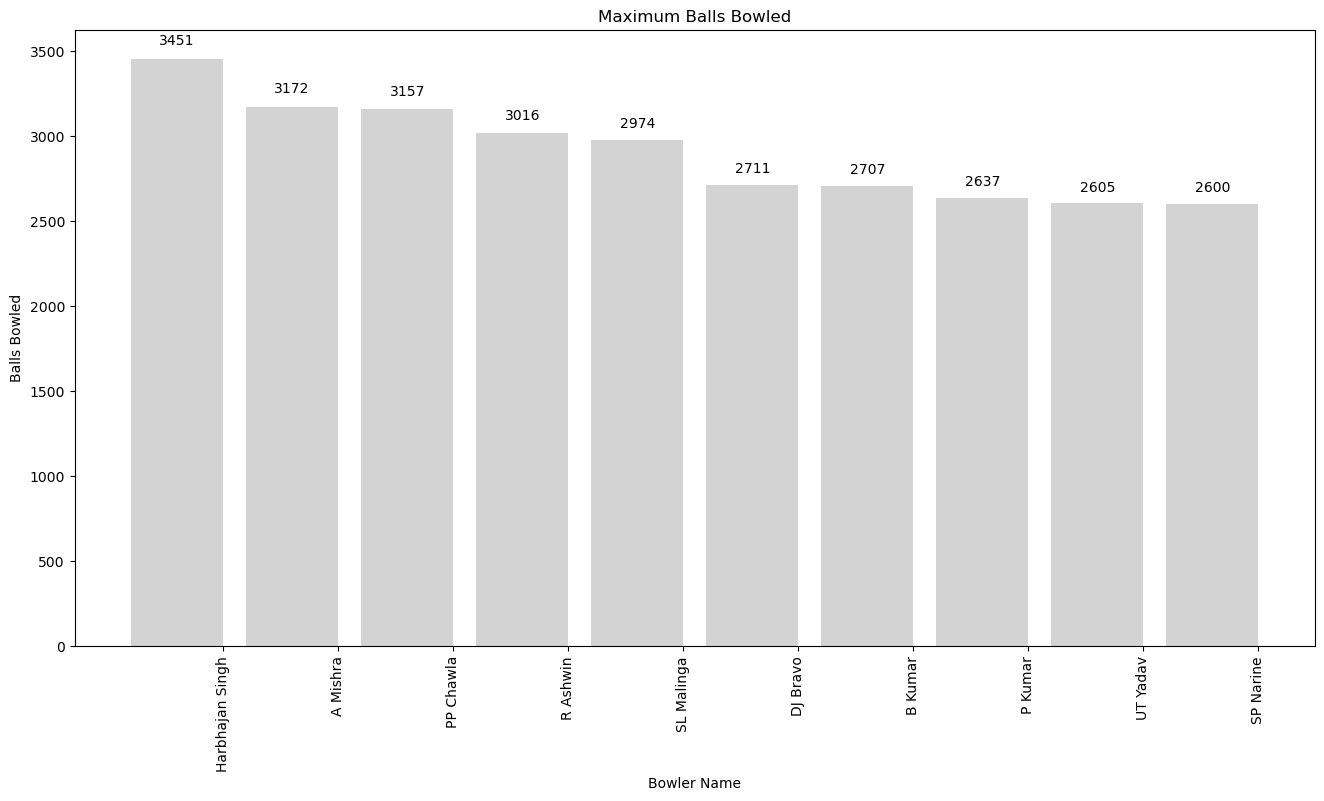

In [1121]:
label=np.array(max_balls_bowled_ten["bowler"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(max_balls_bowled_ten["Balls_bowled"]),width=0.8,color="lightgrey")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Balls Bowled")
ax.set_xlabel("Bowler Name")
ax.set_title("Maximum Balls Bowled")
labelling(bars)
plt.show()

In [966]:
# Maximum wickets taken

maximum_wickets_taken=bowling_analysis.sort_values(by="Wickets_Taken",ascending=False).reset_index(drop=True)

In [967]:
maximum_wickets_taken_ten=maximum_wickets_taken.iloc[:10]

In [968]:
maximum_wickets_taken_ten

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
0,SL Malinga,3390,170,495.666667,2974,17.494118,19.941176,6.839274
1,A Mishra,3804,156,528.666667,3172,20.333333,24.384615,7.195460
2,Harbhajan Singh,3979,150,575.166667,3451,23.006667,26.526667,6.917995
3,PP Chawla,4086,149,526.166667,3157,21.187919,27.422819,7.765600
4,DJ Bravo,3662,147,451.833333,2711,18.442177,24.911565,8.104758
5,B Kumar,3185,133,451.166667,2707,20.353383,23.947368,7.059475
6,R Ashwin,3337,125,502.666667,3016,24.128000,26.696000,6.638594
7,SP Narine,2884,122,433.333333,2600,21.311475,23.639344,6.655385
8,UT Yadav,3550,119,434.166667,2605,21.890756,29.831933,8.176583
9,RA Jadeja,3176,108,423.500000,2541,23.527778,29.407407,7.499410


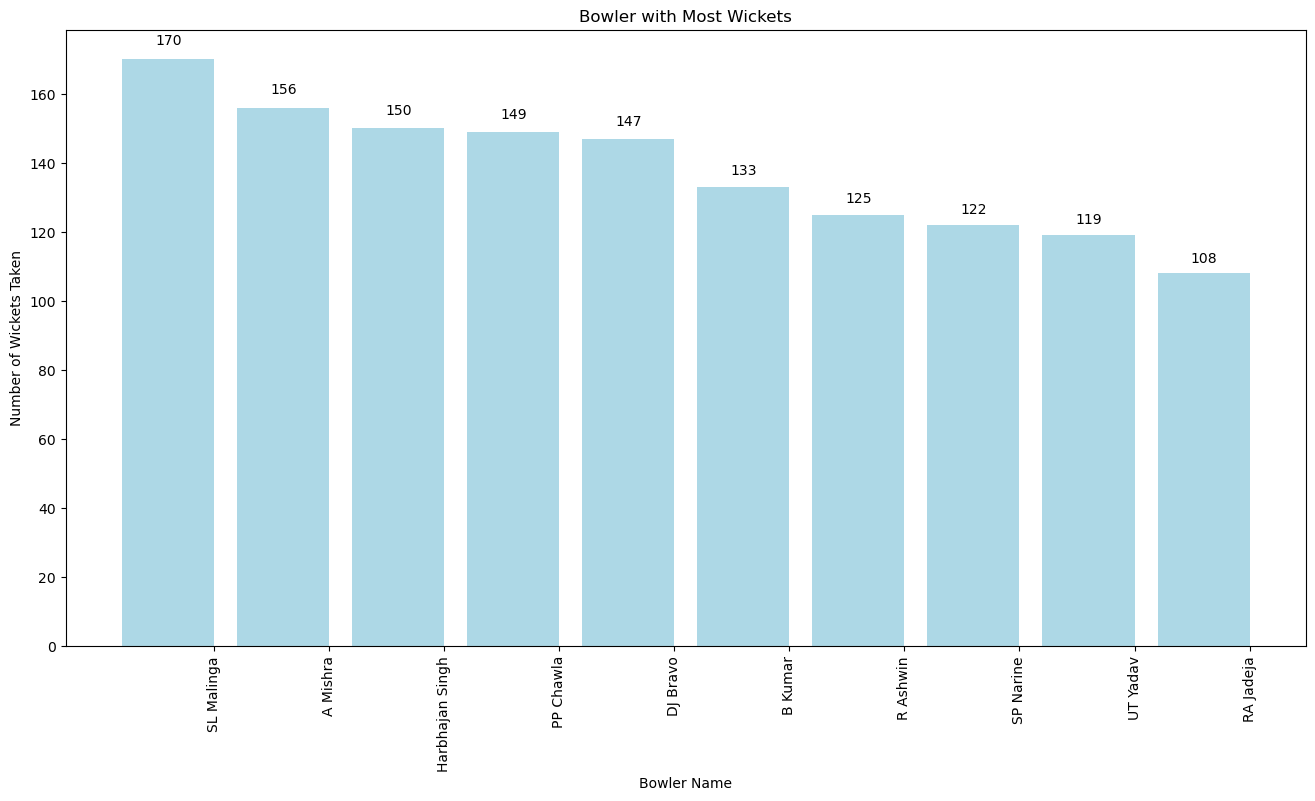

In [1114]:
label=np.array(maximum_wickets_taken_ten["bowler"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(maximum_wickets_taken_ten["Wickets_Taken"]),width=0.8,color="lightblue")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Number of Wickets Taken")
ax.set_xlabel("Bowler Name")
ax.set_title("Bowler with Most Wickets")
labelling(bars)
plt.show()

In [970]:
# Least Bowling Strike Rate (Minimum Balls Bowled 196)

min_bsr=bowling_analysis.sort_values(by="Bowler_strike_rate",ascending=True).reset_index(drop=True)

In [971]:
min_bsr_ten=min_bsr.loc[min_bsr.Balls_bowled>195][:10]

In [972]:
min_bsr_ten

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
10,A Zampa,278,19,37.500000,225,11.842105,14.631579,7.413333
12,Sohail Tanvir,266,22,44.166667,265,12.045455,12.090909,6.022642
13,K Ahmed,345,20,40.166667,241,12.050000,17.250000,8.589212
21,K Rabada,582,31,72.333333,434,14.000000,18.774194,8.046083
22,BJ Hodge,303,17,39.666667,238,14.000000,17.823529,7.638655
24,CRD Fernando,298,17,41.500000,249,14.647059,17.529412,7.180723
26,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297
31,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000
32,S Gopal,746,38,98.833333,593,15.605263,19.631579,7.548061
34,DE Bollinger,693,38,100.000000,600,15.789474,18.236842,6.930000


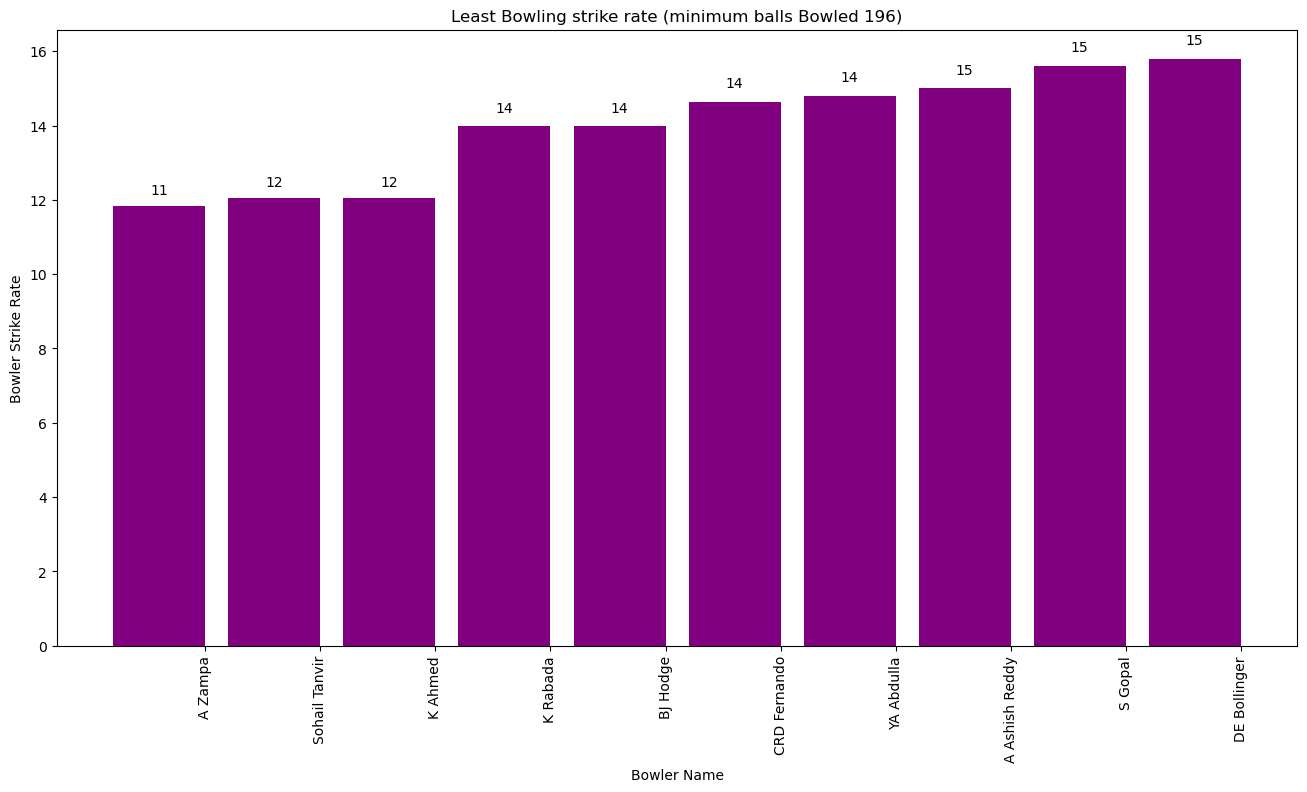

In [973]:
label=np.array(min_bsr_ten["bowler"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(min_bsr_ten["Bowler_strike_rate"]),width=0.8,color="purple")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Bowler Strike Rate")
ax.set_xlabel("Bowler Name")
ax.set_title("Least Bowling strike rate (minimum balls Bowled 196)")
labelling(bars)
plt.show()

In [974]:
# Least Bowling Economy (Minimum 196 Balls Bowled) 

min_be=bowling_analysis.sort_values(by="Bowling_Economy",ascending=True).reset_index(drop=True)

In [975]:
min_be_ten=min_be.loc[min_be.Balls_bowled>195][:10]

In [976]:
min_be_ten

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
10,Sohail Tanvir,266,22,44.166667,265,12.045455,12.090909,6.022642
14,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128
19,SM Pollock,301,11,46.666667,280,25.454545,27.363636,6.450000
20,A Kumble,1058,45,163.833333,983,21.844444,23.511111,6.457782
21,M Muralitharan,1706,64,263.500000,1581,24.703125,26.656250,6.474383
24,GD McGrath,357,12,54.833333,329,27.416667,29.750000,6.510638
25,DW Steyn,2395,96,367.833333,2207,22.989583,24.947917,6.511101
27,J Yadav,247,5,37.666667,226,45.200000,49.400000,6.557522
28,RE van der Merwe,498,21,75.833333,455,21.666667,23.714286,6.567033
29,R Ashwin,3337,125,502.666667,3016,24.128000,26.696000,6.638594


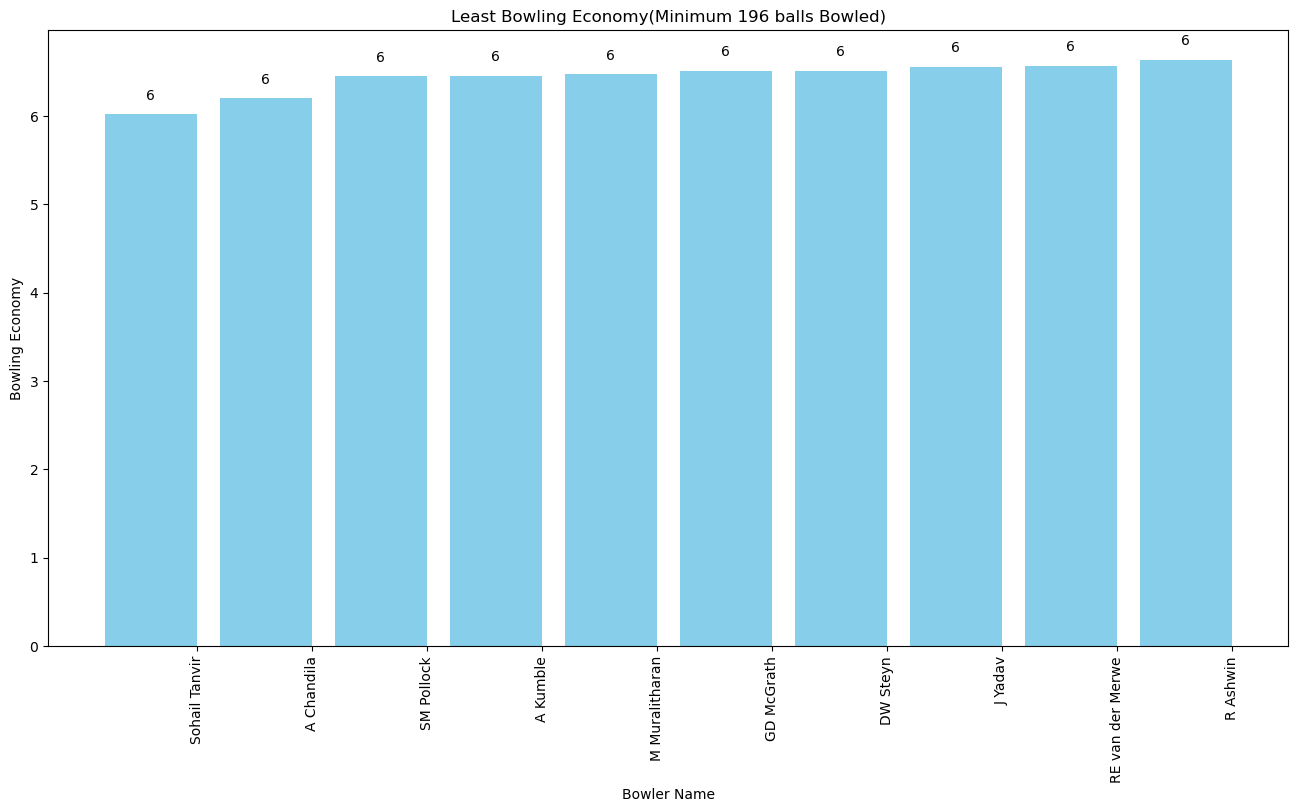

In [977]:
label=np.array(min_be_ten["bowler"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(min_be_ten["Bowling_Economy"]),width=0.8,color="skyblue")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Bowling Economy")
ax.set_xlabel("Bowler Name")
ax.set_title("Least Bowling Economy(Minimum 196 balls Bowled)")
labelling(bars)
plt.show()

In [978]:
# Least Bowling Average (Minimum 196 Balls Bowled)

min_ba=bowling_analysis.sort_values(by="Bowling_Average",ascending=True).reset_index(drop=True)

In [979]:
min_ba_ten=min_ba.loc[min_ba.Balls_bowled>195][:10]

In [980]:
min_ba_ten

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
7,Sohail Tanvir,266,22,44.166667,265,12.045455,12.090909,6.022642
12,A Zampa,278,19,37.500000,225,11.842105,14.631579,7.413333
18,K Ahmed,345,20,40.166667,241,12.050000,17.250000,8.589212
19,CRD Fernando,298,17,41.500000,249,14.647059,17.529412,7.180723
22,BJ Hodge,303,17,39.666667,238,14.000000,17.823529,7.638655
24,DE Bollinger,693,38,100.000000,600,15.789474,18.236842,6.930000
25,AD Mascarenhas,356,19,51.666667,310,16.315789,18.736842,6.890323
26,K Rabada,582,31,72.333333,434,14.000000,18.774194,8.046083
27,MF Maharoof,520,27,73.500000,441,16.333333,19.259259,7.074830
28,R Rampaul,309,16,46.333333,278,17.375000,19.312500,6.669065


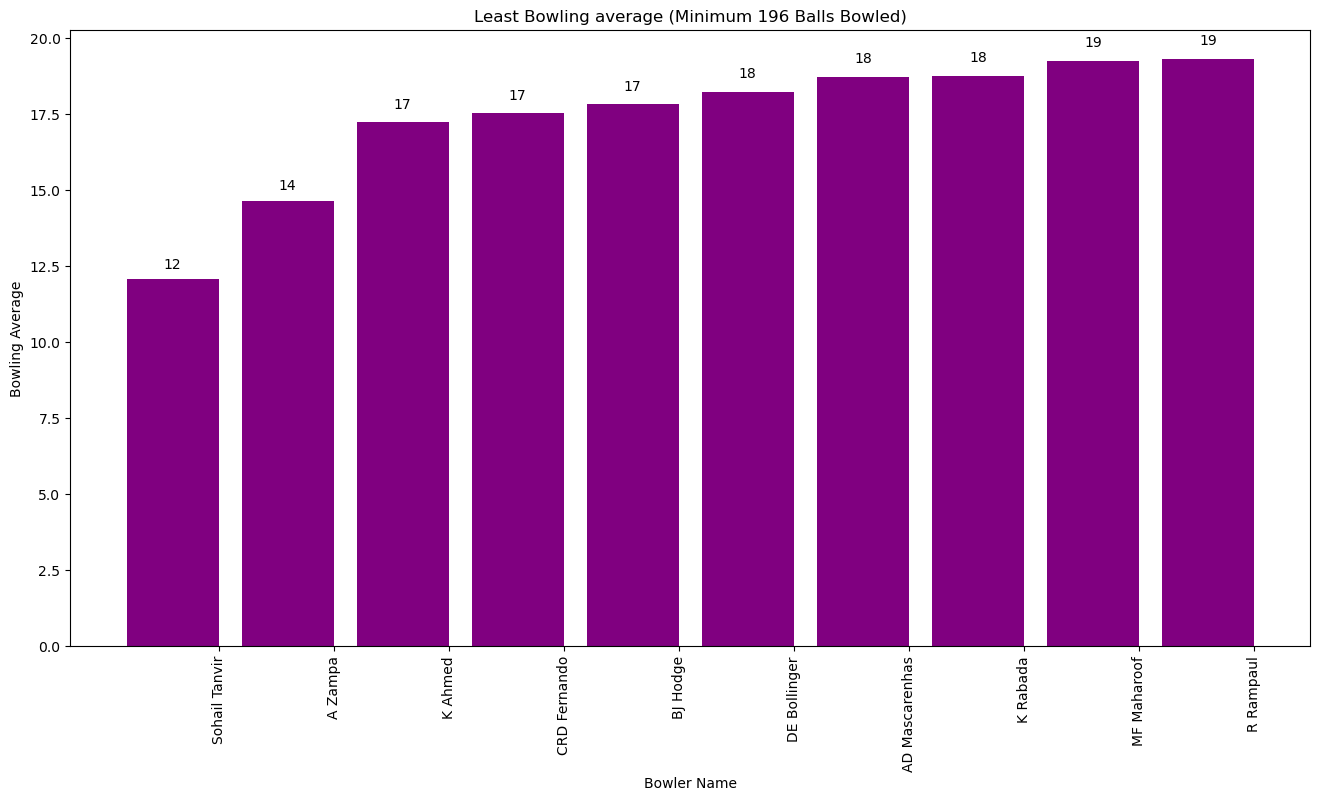

In [981]:
label=np.array(min_ba_ten["bowler"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(min_ba_ten["Bowling_Average"]),width=0.8,color="purple")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Bowling Average")
ax.set_xlabel("Bowler Name")
ax.set_title("Least Bowling average (Minimum 196 Balls Bowled)")
labelling(bars)
plt.show()

In [983]:
melted_df

,id,season,variable,Teams
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore
...,...,...,...,...
1507,11347,2019,team2,Mumbai Indians
1508,11412,2019,team2,Mumbai Indians
1509,11413,2019,team2,Delhi Capitals
1510,11414,2019,team2,Chennai Super Kings


In [984]:
melt_df=pd.melt(matches_df,id_vars=["id","season","winner"],value_vars=["team1","team2"],value_name="team")

In [985]:
melt_df

,id,season,winner,variable,team
0,1,2017,Sunrisers Hyderabad,team1,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant,team1,Mumbai Indians
2,3,2017,Kolkata Knight Riders,team1,Gujarat Lions
3,4,2017,Kings XI Punjab,team1,Rising Pune Supergiant
4,5,2017,Royal Challengers Bangalore,team1,Royal Challengers Bangalore
...,...,...,...,...,...
1507,11347,2019,Mumbai Indians,team2,Mumbai Indians
1508,11412,2019,Mumbai Indians,team2,Mumbai Indians
1509,11413,2019,Delhi Capitals,team2,Delhi Capitals
1510,11414,2019,Chennai Super Kings,team2,Chennai Super Kings


In [986]:
win_per=melt_df["team"].value_counts().reset_index()

In [987]:
win_per

,team,count
0,Mumbai Indians,187
1,Royal Challengers Bangalore,180
2,Kolkata Knight Riders,178
3,Kings XI Punjab,176
4,Chennai Super Kings,164
5,Delhi Daredevils,161
6,Rajasthan Royals,147
7,Sunrisers Hyderabad,108
8,Deccan Chargers,75
9,Pune Warriors,46


In [988]:
win_team=melt_df["winner"].value_counts().reset_index()

In [989]:
win_team

,winner,count
0,Mumbai Indians,218
1,Chennai Super Kings,200
2,Kolkata Knight Riders,184
3,Royal Challengers Bangalore,168
4,Kings XI Punjab,164
5,Rajasthan Royals,150
6,Delhi Daredevils,134
7,Sunrisers Hyderabad,116
8,Deccan Chargers,58
9,Gujarat Lions,26


In [990]:
# Here we find that there is some discrepency in the data we have because the matches won by certain teams > matches played by those teams.


In [991]:
# BATTER ANALYSIS
#
Calculating The Percentage Of Dot Balls played a batsman

def dot_balls(x):
    return (x==0).sum()
def balls_faced(x):
    return len(x)

In [992]:
dt_df=scorecard_df.groupby("batsman")["batsman_runs"].agg([dot_balls,balls_faced]).reset_index()

In [993]:
dt_df=dt_df.loc[dt_df.balls_faced>=300][:10]


In [994]:
dt_df["percentage_of_dot_balls"]=(dt_df["dot_balls"]/dt_df["balls_faced"])*100

In [995]:
dt_df=dt_df.sort_values(by="percentage_of_dot_balls",ascending=False).reset_index(drop=True)

In [996]:
dt_df=dt_df.iloc[:10]

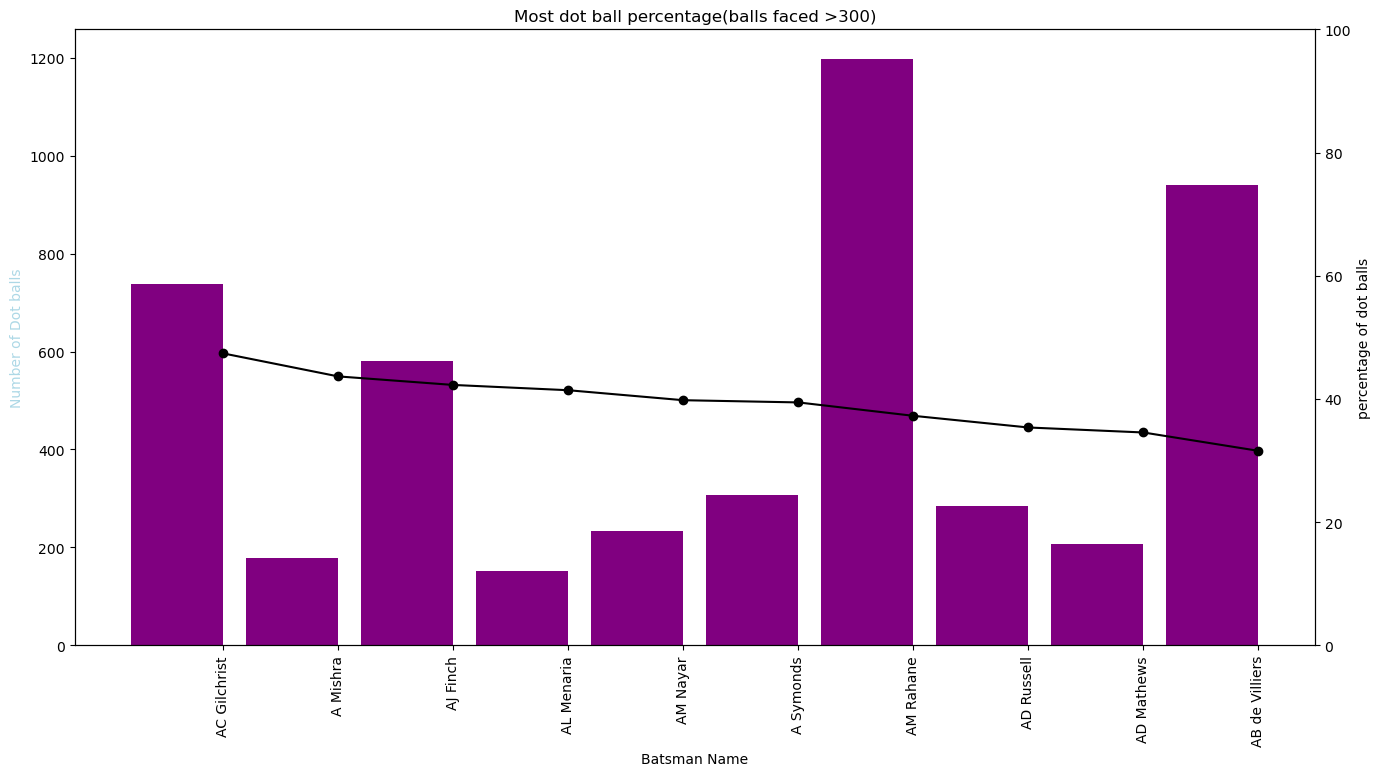

In [1118]:
fig, ax1=plt.subplots(figsize=(16,8))
ax2=ax1.twinx()
label=np.array(dt_df["batsman"])
indices=np.arange(len(label))
bars=ax1.bar(indices,np.array(dt_df["dot_balls"]),width=0.8,color="purple",)
ax1.set_xticks(indices+0.8/2)
ax1.set_xticklabels(label,rotation="vertical")
ax1.set_ylabel("Number of Dot balls",color="lightblue")
ax1.set_xlabel("Batsman Name")
ax1.set_title("Most dot ball percentage(balls faced >300)")
ax2.plot(indices+0.4,np.array(dt_df["percentage_of_dot_balls"]),color="black",marker="o")
ax2.set_ylabel("percentage of dot balls",color="black")
ax2.set_ylim([0,100])
plt.show()

In [1119]:
#Types of dismissal

dis_type=scorecard_df["dismissal_kind"].value_counts().reset_index()


In [999]:
dis_type

,dismissal_kind,count
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


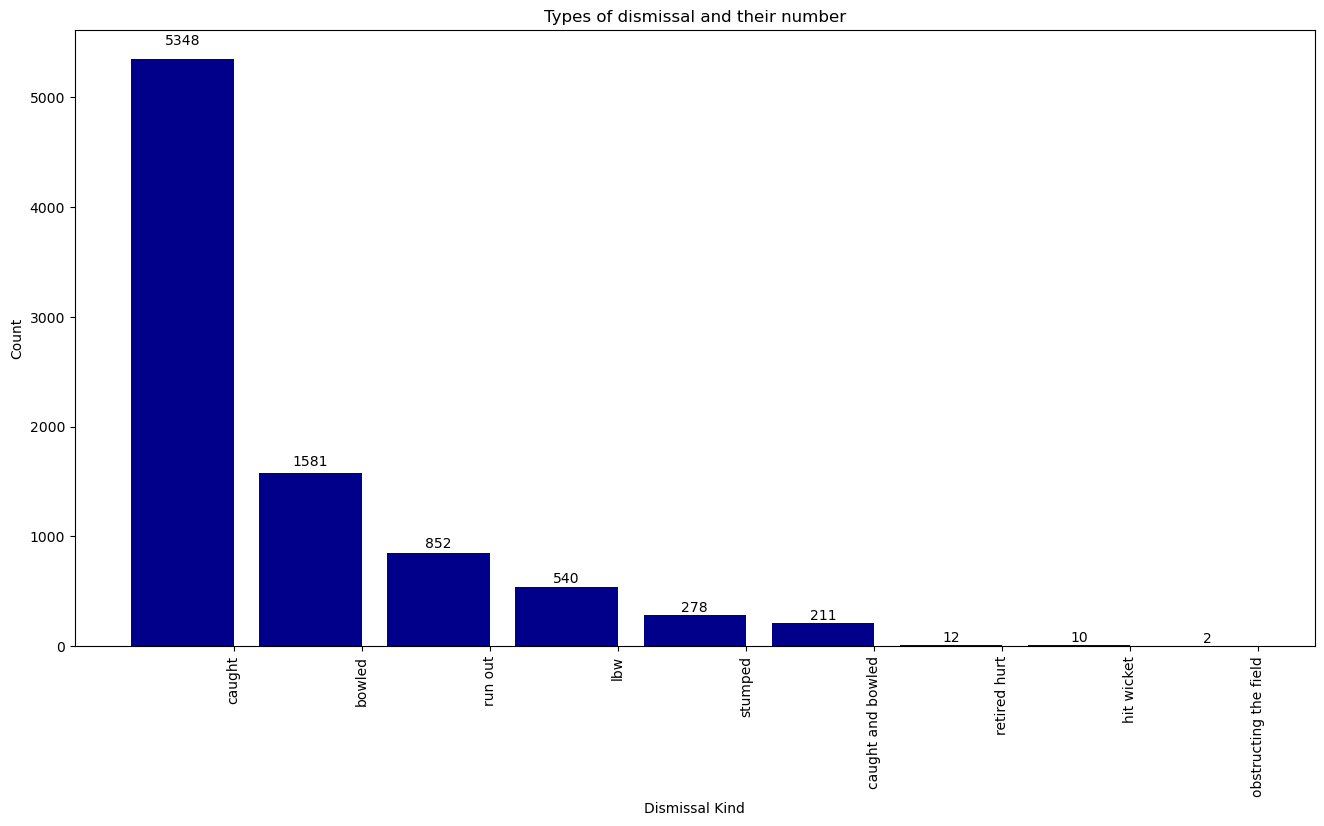

In [1000]:
label=np.array(dis_type["dismissal_kind"])
indices=np.arange(len(label))
fig, ax=plt.subplots(figsize=(16,8))
bars=ax.bar(indices,np.array(dis_type["count"]),width=0.8,color="darkblue")
ax.set_xticks(indices+0.8/2)
ax.set_xticklabels(label,rotation="vertical")
ax.set_ylabel("Count")
ax.set_xlabel("Dismissal Kind")
ax.set_title("Types of dismissal and their number")
labelling(bars)
plt.show()

In [1001]:
#BOWLER ANALYSIS

Dot Balls Bowled by a bowler

bowler_dot=scorecard_df.groupby("bowler")["total_runs"].agg(lambda x: (x==0).sum()).reset_index()

In [1002]:
bowler_dot

,bowler,total_runs
0,A Ashish Reddy,79
1,A Chandila,103
2,A Choudhary,42
3,A Dananjaya,6
4,A Flintoff,20
...,...,...
400,YA Abdulla,88
401,YK Pathan,393
402,YS Chahal,639
403,Yuvraj Singh,258


In [1003]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy
0,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000
1,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128
2,A Choudhary,144,5,18.000000,108,21.600000,28.800000,8.000000
3,A Dananjaya,48,0,4.166667,25,inf,inf,11.520000
4,A Flintoff,105,2,11.000000,66,33.000000,52.500000,9.545455
...,...,...,...,...,...,...,...,...
400,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297
401,YK Pathan,1415,42,197.333333,1184,28.190476,33.690476,7.170608
402,YS Chahal,2366,100,306.833333,1841,18.410000,23.660000,7.711027
403,Yuvraj Singh,1078,36,147.000000,882,24.500000,29.944444,7.333333


In [1004]:
bowling_analysis.insert(8,"Dot_Balls_Bowled",bowler_dot["total_runs"])

In [1005]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Balls_Bowled
0,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000,79
1,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128,103
2,A Choudhary,144,5,18.000000,108,21.600000,28.800000,8.000000,42
3,A Dananjaya,48,0,4.166667,25,inf,inf,11.520000,6
4,A Flintoff,105,2,11.000000,66,33.000000,52.500000,9.545455,20
...,...,...,...,...,...,...,...,...,...
400,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297,88
401,YK Pathan,1415,42,197.333333,1184,28.190476,33.690476,7.170608,393
402,YS Chahal,2366,100,306.833333,1841,18.410000,23.660000,7.711027,639
403,Yuvraj Singh,1078,36,147.000000,882,24.500000,29.944444,7.333333,258


In [1006]:
# BATTING ANALYSIS

batting_analysis=scorecard_df.groupby("batsman")["batsman_runs"].agg("sum").reset_index()

In [1007]:
batting_analysis

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [1008]:
balls_played=scorecard_df.groupby("batsman")["ball"].agg("count").reset_index()

In [1009]:
batting_analysis.insert(2,"Balls_Faced",balls_played["ball"])

In [1010]:
batting_analysis

,batsman,batsman_runs,Balls_Faced
0,A Ashish Reddy,280,196
1,A Chandila,4,7
2,A Chopra,53,75
3,A Choudhary,25,20
4,A Dananjaya,4,5
...,...,...,...
511,YV Takawale,192,183
512,Yashpal Singh,47,67
513,Younis Khan,3,7
514,Yuvraj Singh,2765,2207


In [1011]:
tot_dis=scorecard_df.groupby("batsman")["player_dismissed"].agg("count").reset_index()

In [1012]:
batting_analysis.insert(3,"Total_Dismissal",tot_dis["player_dismissed"])

In [1013]:
batting_analysis["Batting_Average"]=batting_analysis["batsman_runs"]/batting_analysis["Total_Dismissal"]

In [1014]:
batting_analysis["Batting_Strike_Rate"]=(batting_analysis["batsman_runs"]/batting_analysis["Balls_Faced"])*100

In [1015]:
batting_analysis

,batsman,batsman_runs,Balls_Faced,Total_Dismissal,Batting_Average,Batting_Strike_Rate
0,A Ashish Reddy,280,196,15,18.666667,142.857143
1,A Chandila,4,7,1,4.000000,57.142857
2,A Chopra,53,75,5,10.600000,70.666667
3,A Choudhary,25,20,2,12.500000,125.000000
4,A Dananjaya,4,5,0,inf,80.000000
...,...,...,...,...,...,...
511,YV Takawale,192,183,8,24.000000,104.918033
512,Yashpal Singh,47,67,4,11.750000,70.149254
513,Younis Khan,3,7,1,3.000000,42.857143
514,Yuvraj Singh,2765,2207,109,25.366972,125.283190


In [1016]:
batter_dot_ball=scorecard_df.groupby("batsman")["batsman_runs"].agg(lambda x: (x==0).sum()).reset_index()

In [1017]:
batter_dot_ball

,batsman,batsman_runs
0,A Ashish Reddy,61
1,A Chandila,3
2,A Chopra,45
3,A Choudhary,4
4,A Dananjaya,2
...,...,...
511,YV Takawale,100
512,Yashpal Singh,39
513,Younis Khan,4
514,Yuvraj Singh,967


In [1018]:
batting_analysis.insert(6,"Dot_Balls",batter_dot_ball["batsman_runs"])

In [1019]:
batting_analysis["Dot_Ball_Percentage"]=(batting_analysis["Dot_Balls"]/batting_analysis["Balls_Faced"])*100

In [1020]:
batting_analysis

,batsman,batsman_runs,Balls_Faced,Total_Dismissal,Batting_Average,Batting_Strike_Rate,Dot_Balls,Dot_Ball_Percentage
0,A Ashish Reddy,280,196,15,18.666667,142.857143,61,31.122449
1,A Chandila,4,7,1,4.000000,57.142857,3,42.857143
2,A Chopra,53,75,5,10.600000,70.666667,45,60.000000
3,A Choudhary,25,20,2,12.500000,125.000000,4,20.000000
4,A Dananjaya,4,5,0,inf,80.000000,2,40.000000
...,...,...,...,...,...,...,...,...
511,YV Takawale,192,183,8,24.000000,104.918033,100,54.644809
512,Yashpal Singh,47,67,4,11.750000,70.149254,39,58.208955
513,Younis Khan,3,7,1,3.000000,42.857143,4,57.142857
514,Yuvraj Singh,2765,2207,109,25.366972,125.283190,967,43.815134


D:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


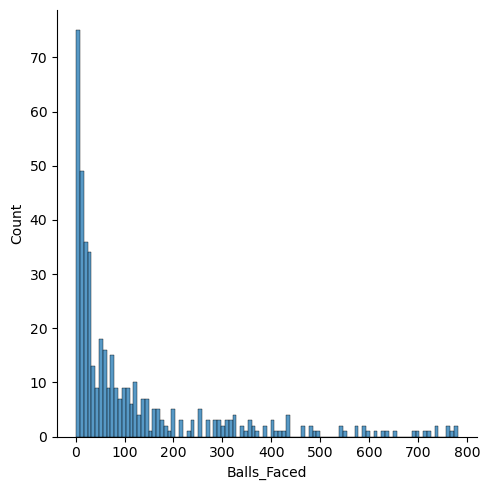

In [1021]:
# DISTRIBUTION OF BALLS FACED BY A BATTER

sns.displot(batting_analysis.loc[batting_analysis.Balls_Faced<800],x="Balls_Faced", bins=100)

In [1022]:
len(batting_analysis.loc[batting_analysis.Balls_Faced>800])/len(batting_analysis["Balls_Faced"])

0.13178294573643412

In [1023]:
# MEDIAN VALUE OF BALLS FACED

np.percentile(batting_analysis.Balls_Faced,50)

70.5

D:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


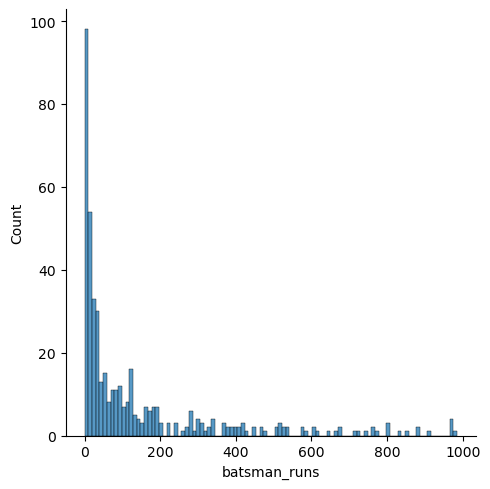

In [1024]:
# Distribution of Runs
sns.displot(batting_analysis.loc[batting_analysis.batsman_runs<1000],x="batsman_runs", bins=100)

In [1025]:
len(batting_analysis.loc[batting_analysis.batsman_runs>1000])/len(batting_analysis)

0.13565891472868216

In [1026]:
#median of runs Scored

np.percentile(batting_analysis.batsman_runs,50)

74.0

In [1027]:
bat_cluster=batting_analysis.drop(["Total_Dismissal","Dot_Balls"],axis=1)

In [1028]:
# Taking Median value of balls faced
bat_cluster=bat_cluster.loc[bat_cluster.Balls_Faced>70].reset_index()

In [1029]:
bat_cluster

,index,batsman,batsman_runs,Balls_Faced,Batting_Average,Batting_Strike_Rate,Dot_Ball_Percentage
0,0,A Ashish Reddy,280,196,18.666667,142.857143,31.122449
1,2,A Chopra,53,75,10.600000,70.666667,60.000000
2,6,A Hales,152,119,25.333333,127.731092,38.655462
3,9,A Mishra,368,410,12.266667,89.756098,43.658537
4,14,A Symonds,974,781,37.461538,124.711908,39.436620
...,...,...,...,...,...,...,...
253,507,Y Venugopal Rao,985,865,23.452381,113.872832,41.040462
254,509,YK Pathan,3241,2334,29.198198,138.860326,36.675236
255,511,YV Takawale,192,183,24.000000,104.918033,54.644809
256,514,Yuvraj Singh,2765,2207,25.366972,125.283190,43.815134


In [1030]:
bat_cluster_data=bat_cluster.drop(["Balls_Faced","batsman_runs","batsman"],axis=1)

In [1031]:
bat_cluster_data=bat_cluster_data.drop(columns="index")

In [1032]:
bat_cluster_data_1=bat_cluster_data.copy()

In [ ]:
# K MEANS CLUSTERING FOR BATTING PARAMETERS

In [1033]:
cols = bat_cluster_data.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

bat_cluster_data = ms.fit_transform(bat_cluster_data)

In [1034]:
bat_cluster_data_2= pd.DataFrame(bat_cluster_data, columns=[cols])

In [1035]:
bat_cluster_data_2

,Batting_Average,Batting_Strike_Rate,Dot_Ball_Percentage
0,0.191111,0.733993,0.096688
1,0.097000,0.216290,0.821965
2,0.268889,0.625519,0.285884
3,0.116444,0.353187,0.411540
4,0.410385,0.603867,0.305504
...,...,...,...
253,0.246944,0.526137,0.345785
254,0.313979,0.705330,0.236150
255,0.253333,0.461919,0.687466
256,0.269281,0.607964,0.415473


D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

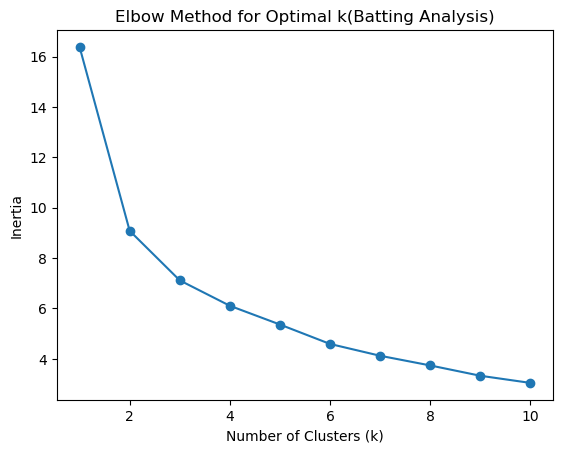

In [1036]:
# Applying KMeans Clustering

# Starting with estimating the number of clusters required by Elbow Method

k_values = range(1, 11)
inertia_values = []

# Calculating inertia for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bat_cluster_data_2)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k(Batting Analysis)')
plt.show()



In [1037]:
# The Kink appears to be at 2, so 2 clusters can be used

In [1038]:
k = 6

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(bat_cluster_data_2)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [1039]:
bat_cluster_data_1.loc[:,"labels"]= kmeans.labels_

In [1040]:
bat_cluster_data_1

,Batting_Average,Batting_Strike_Rate,Dot_Ball_Percentage,labels
0,18.666667,142.857143,31.122449,1
1,10.600000,70.666667,60.000000,0
2,25.333333,127.731092,38.655462,4
3,12.266667,89.756098,43.658537,5
4,37.461538,124.711908,39.436620,3
...,...,...,...,...
253,23.452381,113.872832,41.040462,4
254,29.198198,138.860326,36.675236,1
255,24.000000,104.918033,54.644809,0
256,25.366972,125.283190,43.815134,2


In [1041]:
bat_cluster_data_1["batsman"]=bat_cluster["batsman"]

In [1042]:
bat_cluster_data_i=bat_cluster_data_1.groupby('labels').agg({'batsman':'size','Batting_Average':['max','mean','min'],'Batting_Strike_Rate':['max','mean','min'],'Dot_Ball_Percentage':['max','mean','min']})

<Axes: xlabel='Batting_Average', ylabel='Dot_Ball_Percentage'>

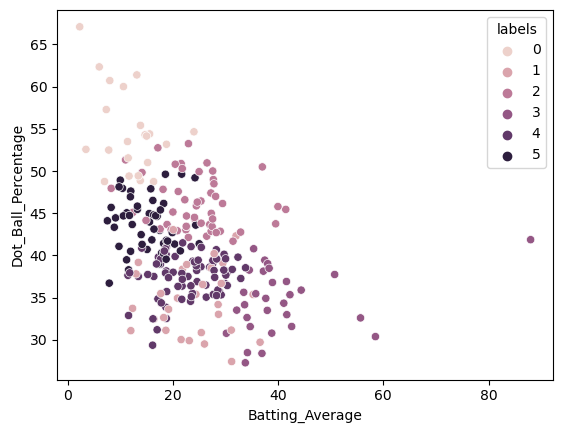

In [1043]:
sns.scatterplot(x="Batting_Average", y="Dot_Ball_Percentage",hue="labels",data=bat_cluster_data_1)

In [1044]:
bat_cluster_data_i

batsman Batting_Average                       Batting_Strike_Rate  \
          size             max       mean        min                 max   
labels                                                                     
0           22       24.000000  11.855321   2.285714          112.162162   
1           30       36.571429  23.654494  12.000000          179.950187   
2           51       41.454545  24.430629   8.272727          145.640370   
3           30       88.000000  40.646722  30.166667          159.726962   
4           75       33.810219  22.969056  11.454545          135.483871   
5           50       25.000000  15.161560   7.545455          113.128492   

                               Dot_Ball_Percentage                        
              mean         min                 max       mean        min  
labels                                                                    
0        84.813978   40.506329           67.088608  54.595423  48.739496  
1       150.525500  131.237323           43.035343  34.738010  27.419355  
2       122.031219  101.734540           53.240741  46.076793  41.682455  
3       132.028651  102.325581           41.860465  34.582680  27.272727  
4       122.147996  103.669725           41.481481  37.446676  29.357798  
5       100.723392   73.684211           49.627792  43.717025  36.708861

In [1045]:
#Batsman in cluster 3 appear to be star batters with a very decent batting average, batting strike rate and Dot Ball Percentage

In [1090]:
bat_cluster_data_1

,Batting_Average,Batting_Strike_Rate,Dot_Ball_Percentage,labels,batsman
0,18.666667,142.857143,31.122449,1,A Ashish Reddy
1,10.600000,70.666667,60.000000,0,A Chopra
2,25.333333,127.731092,38.655462,4,A Hales
3,12.266667,89.756098,43.658537,5,A Mishra
4,37.461538,124.711908,39.436620,3,A Symonds
...,...,...,...,...,...
253,23.452381,113.872832,41.040462,4,Y Venugopal Rao
254,29.198198,138.860326,36.675236,1,YK Pathan
255,24.000000,104.918033,54.644809,0,YV Takawale
256,25.366972,125.283190,43.815134,2,Yuvraj Singh


In [1091]:
bat_cluster_data_sorted=bat_cluster_data_1.loc[bat_cluster_data_1.labels==3].reset_index()

In [1092]:
bat_cluster_data_sorted=bat_cluster_data_sorted.sort_values(by="Batting_Strike_Rate",ascending=False).reset_index(drop=True)[:10]

In [1094]:
bat_cluster_data_sorted.drop(columns="index")

,Batting_Average,Batting_Strike_Rate,Dot_Ball_Percentage,labels,batsman
0,58.500000,159.726962,30.375427,3,J Bairstow
1,37.657895,150.000000,34.905660,3,JC Buttler
2,42.576923,148.740343,31.575411,3,AB de Villiers
3,41.587719,139.523249,36.904061,3,DA Warner
4,35.351351,139.297125,40.788072,3,CA Lynn
5,44.384615,138.038278,35.885167,3,HM Amla
6,41.081633,137.406143,34.334471,3,KL Rahul
7,34.090909,136.264535,32.630814,3,DA Miller
8,34.166667,135.761589,28.476821,3,TM Head
9,37.940678,134.930681,33.484027,3,MS Dhoni


In [1047]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Balls_Bowled
0,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000,79
1,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128,103
2,A Choudhary,144,5,18.000000,108,21.600000,28.800000,8.000000,42
3,A Dananjaya,48,0,4.166667,25,inf,inf,11.520000,6
4,A Flintoff,105,2,11.000000,66,33.000000,52.500000,9.545455,20
...,...,...,...,...,...,...,...,...,...
400,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297,88
401,YK Pathan,1415,42,197.333333,1184,28.190476,33.690476,7.170608,393
402,YS Chahal,2366,100,306.833333,1841,18.410000,23.660000,7.711027,639
403,Yuvraj Singh,1078,36,147.000000,882,24.500000,29.944444,7.333333,258


D:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


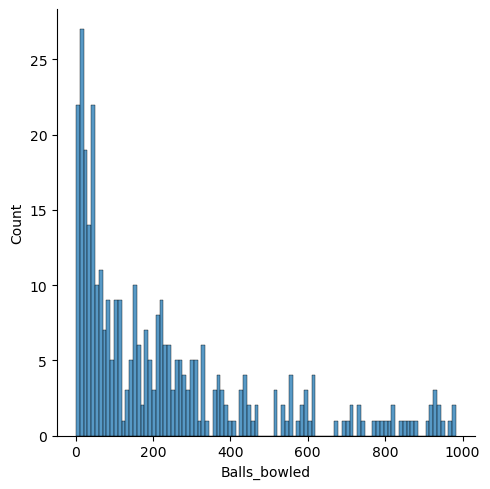

In [1048]:
sns.displot(bowling_analysis.loc[bowling_analysis.Balls_bowled<1000],x="Balls_bowled",bins=100)

In [1049]:
len(bowling_analysis.loc[bowling_analysis.Balls_bowled>1000])/len(bowling_analysis.Balls_bowled)

0.1308641975308642

In [1050]:
np.percentile(bowling_analysis.Balls_bowled,50)

196.0

In [1051]:
# So the median of balls Bowled is 196

In [1052]:
bowling_analysis["Dot_Ball_Percentage"]=(bowling_analysis["Dot_Balls_Bowled"]/bowling_analysis["Balls_bowled"])*100

In [1053]:
bowling_analysis

,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Balls_Bowled,Dot_Ball_Percentage
0,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000,79,29.259259
1,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128,103,44.017094
2,A Choudhary,144,5,18.000000,108,21.600000,28.800000,8.000000,42,38.888889
3,A Dananjaya,48,0,4.166667,25,inf,inf,11.520000,6,24.000000
4,A Flintoff,105,2,11.000000,66,33.000000,52.500000,9.545455,20,30.303030
...,...,...,...,...,...,...,...,...,...,...
400,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297,88,39.639640
401,YK Pathan,1415,42,197.333333,1184,28.190476,33.690476,7.170608,393,33.192568
402,YS Chahal,2366,100,306.833333,1841,18.410000,23.660000,7.711027,639,34.709397
403,Yuvraj Singh,1078,36,147.000000,882,24.500000,29.944444,7.333333,258,29.251701


In [1054]:
bowling_cluster=bowling_analysis.loc[bowling_analysis.Balls_bowled>195].reset_index()

In [1055]:
bowling_cluster_data=bowling_cluster.drop(["bowler","runs_conceeded_by_bowler","Overs_Bowled","Wickets_Taken","Balls_bowled","Dot_Balls_Bowled"],axis=1)

In [1056]:
bowling_cluster_data

,index,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Ball_Percentage
0,0,15.000000,22.000000,8.800000,29.259259
1,1,21.272727,22.000000,6.205128,44.017094
2,6,21.844444,23.511111,6.457782,38.046796
3,7,20.333333,24.384615,7.195460,34.930643
4,8,44.571429,67.428571,9.076923,28.846154
...,...,...,...,...,...
198,400,14.800000,20.466667,8.297297,39.639640
199,401,28.190476,33.690476,7.170608,33.192568
200,402,18.410000,23.660000,7.711027,34.709397
201,403,24.500000,29.944444,7.333333,29.251701


In [1057]:
bowling_cluster_data_1=bowling_cluster_data.copy()

In [1058]:
# K MEANS CLUSTERING FOR BOWLING ANALYSIS

#Normalizing Data 
cols1 = bowling_cluster_data.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

bowling_cluster_data = ms.fit_transform(bowling_cluster_data)

In [1059]:
bowling_cluster_data= pd.DataFrame(bowling_cluster_data, columns=[cols1])

In [1060]:
bowling_cluster_data

,index,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Ball_Percentage
0,0.000000,0.058309,0.124005,0.698292,0.353300
1,0.002475,0.174132,0.124005,0.045881,0.898562
2,0.014851,0.184688,0.142915,0.109404,0.677975
3,0.017327,0.156787,0.153846,0.294874,0.562842
4,0.019802,0.604332,0.692508,0.767917,0.338037
...,...,...,...,...,...
198,0.990099,0.054616,0.104816,0.571901,0.736827
199,0.992574,0.301865,0.270302,0.288625,0.498625
200,0.995050,0.121273,0.144778,0.424499,0.554668
201,0.997525,0.233722,0.223423,0.329538,0.353021


D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

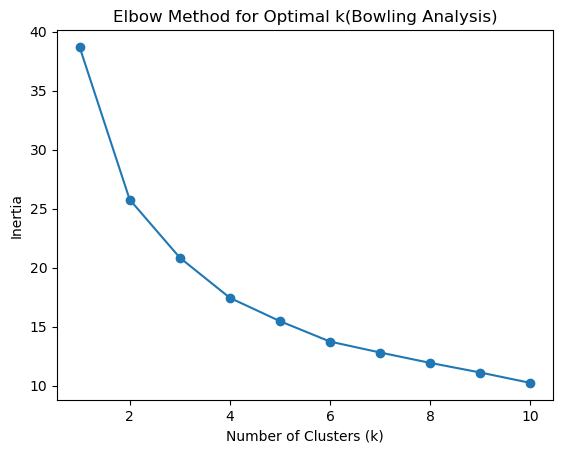

In [1061]:
# Applying KMeans Clustering (For Bowling CLuster Data)

# Starting with estimating the number of clusters required by Elbow Method

k_values = range(1, 11)
inertia_values = []

# Calculating inertia for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bowling_cluster_data)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k(Bowling Analysis)')
plt.show()


In [1062]:
k = 6

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(bowling_cluster_data)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [1063]:
bowling_cluster_data_1.loc[:,"labels"]= kmeans.labels_

In [1065]:
bowling_cluster

,index,bowler,runs_conceeded_by_bowler,Wickets_Taken,Overs_Bowled,Balls_bowled,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Balls_Bowled,Dot_Ball_Percentage
0,0,A Ashish Reddy,396,18,45.000000,270,15.000000,22.000000,8.800000,79,29.259259
1,1,A Chandila,242,11,39.000000,234,21.272727,22.000000,6.205128,103,44.017094
2,6,A Kumble,1058,45,163.833333,983,21.844444,23.511111,6.457782,374,38.046796
3,7,A Mishra,3804,156,528.666667,3172,20.333333,24.384615,7.195460,1108,34.930643
4,8,A Mithun,472,7,52.000000,312,44.571429,67.428571,9.076923,90,28.846154
...,...,...,...,...,...,...,...,...,...,...,...
198,400,YA Abdulla,307,15,37.000000,222,14.800000,20.466667,8.297297,88,39.639640
199,401,YK Pathan,1415,42,197.333333,1184,28.190476,33.690476,7.170608,393,33.192568
200,402,YS Chahal,2366,100,306.833333,1841,18.410000,23.660000,7.711027,639,34.709397
201,403,Yuvraj Singh,1078,36,147.000000,882,24.500000,29.944444,7.333333,258,29.251701


In [1067]:
bowling_cluster_data_1.drop(columns="index")

,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Ball_Percentage,labels
0,15.000000,22.000000,8.800000,29.259259,2
1,21.272727,22.000000,6.205128,44.017094,0
2,21.844444,23.511111,6.457782,38.046796,0
3,20.333333,24.384615,7.195460,34.930643,0
4,44.571429,67.428571,9.076923,28.846154,2
...,...,...,...,...,...
198,14.800000,20.466667,8.297297,39.639640,1
199,28.190476,33.690476,7.170608,33.192568,1
200,18.410000,23.660000,7.711027,34.709397,1
201,24.500000,29.944444,7.333333,29.251701,1


In [1070]:
bowling_cluster_data_1.insert(0,"bowler",bowling_cluster["bowler"])

In [1072]:
bowling_cluster_data_1.drop(columns="index")

,bowler,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Ball_Percentage,labels
0,A Ashish Reddy,15.000000,22.000000,8.800000,29.259259,2
1,A Chandila,21.272727,22.000000,6.205128,44.017094,0
2,A Kumble,21.844444,23.511111,6.457782,38.046796,0
3,A Mishra,20.333333,24.384615,7.195460,34.930643,0
4,A Mithun,44.571429,67.428571,9.076923,28.846154,2
...,...,...,...,...,...,...
198,YA Abdulla,14.800000,20.466667,8.297297,39.639640,1
199,YK Pathan,28.190476,33.690476,7.170608,33.192568,1
200,YS Chahal,18.410000,23.660000,7.711027,34.709397,1
201,Yuvraj Singh,24.500000,29.944444,7.333333,29.251701,1


In [1074]:
bowling_cluster_data_i=bowling_cluster_data_1.groupby('labels').agg({'bowler':'size','Bowling_Average':['max','mean','min'],'Bowler_strike_rate':['max','mean','min'],'Dot_Ball_Percentage':['max','mean','min'],'Bowling_Economy':['max','mean','min']})

In [1075]:
bowling_cluster_data_i

bowler Bowling_Average                       Bowler_strike_rate  \
         size             max       mean        min                max   
labels                                                                   
0          42       49.400000  28.452617  14.631579          45.200000   
1          31       43.500000  29.345216  19.631579          35.333333   
2          40       67.428571  36.773605  21.923077          44.571429   
3          45       42.545455  29.418386  17.250000          30.125000   
4          32       40.538462  25.833494  12.090909          34.076923   
5          13       92.000000  55.707978  44.720000          66.000000   

                             Dot_Ball_Percentage                        \
             mean        min                 max       mean        min   
labels                                                                   
0       23.585829  11.842105           46.504559  38.145280  30.645161   
1       22.633922  14.800000           39.639640  34.107443  26.785714   
2       25.626812  15.000000           35.619469  29.374511  23.979592   
3       21.846251  12.050000           38.036810  32.737325  25.730994   
4       21.909136  12.045455           46.762590  40.474083  32.527473   
5       40.539413  30.916667           42.272727  31.395294  19.696970   

       Bowling_Economy                      
                   max      mean       min  
labels                                      
0             8.079855  7.267032  6.205128  
1             8.826846  7.824647  7.098937  
2            10.000000  8.609528  7.502591  
3             9.681159  8.096227  7.090909  
4             8.420000  7.059435  6.022642  
5             9.295195  8.285443  7.045685

<Axes: xlabel='Bowling_Economy', ylabel='Bowler_strike_rate'>

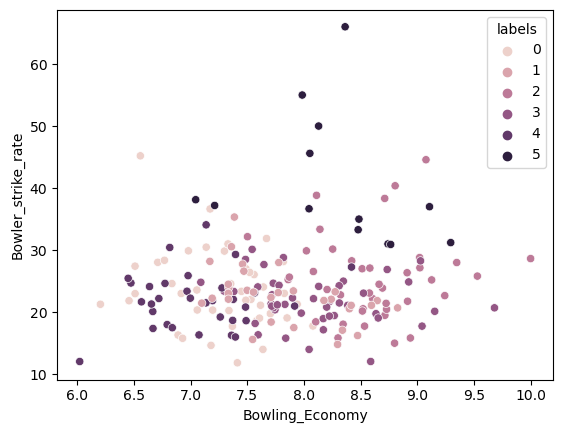

In [1120]:
# Scatterplot bowling Analysis
sns.scatterplot(x="Bowling_Economy", y="Bowler_strike_rate",hue="labels",data=bowling_cluster_data_1)

In [1078]:
# Bowlers in Label 4 have a very good bowling average, bowling strike rate, Dot ball percentage and bowling economy.

In [1083]:
bowling_cluster_data_sorted=bowling_cluster_data_1.loc[bowling_cluster_data_1.labels==4].reset_index()

In [1122]:
bowling_cluster_data_sorted=bowling_cluster_data_sorted.sort_values(by="Bowling_Average",ascending=True).reset_index(drop=True)

In [1123]:
bowling_cluster_data_sorted.drop(columns=["level_0","index"])[:10]

,bowler,Bowler_strike_rate,Bowling_Average,Bowling_Economy,Dot_Ball_Percentage,labels
0,Sohail Tanvir,12.045455,12.090909,6.022642,45.660377,4
1,MF Maharoof,16.333333,19.259259,7.074830,37.414966,4
2,R Rampaul,17.375000,19.312500,6.669065,46.762590,4
3,WPUJC Vaas,16.000000,19.722222,7.395833,44.444444,4
4,SL Malinga,17.494118,19.941176,6.839274,38.466711,4
5,NM Coulter-Nile,16.277778,19.972222,7.361775,42.150171,4
6,MA Starc,18.000000,20.382353,6.794118,37.908497,4
7,Rashid Khan,20.109091,22.345455,6.667269,40.054250,4
8,MM Patel,18.675676,22.945946,7.371925,42.691751,4
9,Sandeep Sharma,18.626506,23.253012,7.490298,41.979301,4
